In [318]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation.
from scipy import stats

# for min_max scaling.
from mlxtend.preprocessing import minmax_scaling

# plotting modules.
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

df = pd.read_csv("store.csv")
df.head()

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,$54.00
1,MyStore,1,3,2,1,10,Cash,7,-$17.80
2,MyStore,1,3,2,1,10,Card,7,$41.99
3,MyStore,1,3,2,1,11,Card,20,$412.50
4,MyStore,1,3,2,1,12,Cash,1,-$18.00


First, let us clean the data set ready for the analysis. As you can see there is a dollar sign in front of every Amount. This will make it very difficult to perform mathematical operations. As part of the cleaning, we will remove the dollar sign.

In [319]:
df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')
df['Amount'] = pd.to_numeric(df['Amount'])
df.head()


,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00


Another thing to note is in the Branch name variable, only one branch is seen through out the whole data frame. We therefore do not need this variable. If the data was from different stores we would have need for it. Below we drop the variable from the data frame

In [320]:
df.drop('BranchName',axis=1, inplace=True)
df.head(10)

,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,1,3,2,1,9,Card,3,54.00
1,1,3,2,1,10,Cash,7,-17.80
2,1,3,2,1,10,Card,7,41.99
3,1,3,2,1,11,Card,20,412.50
4,1,3,2,1,12,Cash,1,-18.00
5,1,3,2,1,12,Card,1,-5.00
6,1,3,2,1,12,Card,15,118.50
7,1,3,2,1,13,Cash,90,-94.92
8,1,3,2,1,13,Card,28,423.50
9,1,3,2,1,14,Cash,34,-95.39


Always check out for missing values, fortunately for this datset we have no missing values, This is not always the case and it is important to remember ways to handle missing data that we tackled in the previous task.

In [321]:
# get the number of missing data points per column.
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns.
missing_values_count[0:8]

Week                0
DayWeek             0
Day                 0
Month               0
Hour                0
Transaction_Type    0
Units               0
Amount              0
dtype: int64

From the histogram below, we can see that the range is -1000 to 1000. Well, it is unusual for the a purchase to total to a negative value. 

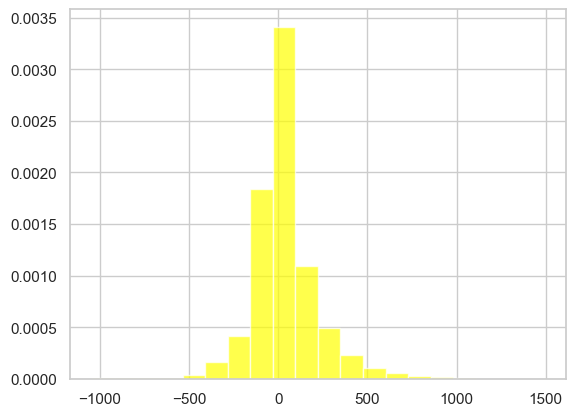

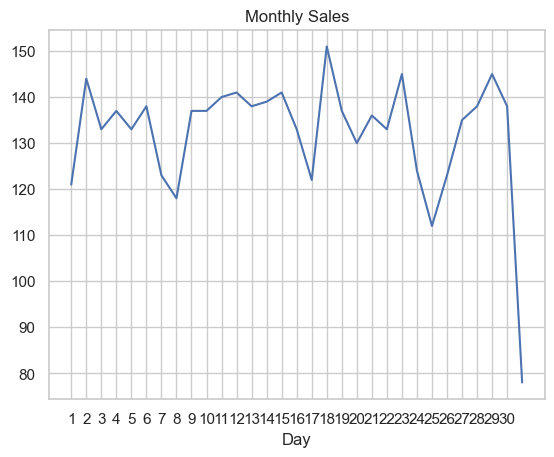

In [322]:

plt.hist(df['Amount'], 20, density =1,facecolor="yellow", alpha=0.7)
plt.show()

test = df['Amount'].groupby(df['Day']).size()
plot_month = test.plot(title = 'Monthly Sales', xticks = (range(1,31)))



In [323]:
positive = df.Amount[df['Amount'] > 0].count()
negative = df.Amount[df['Amount'] < 0].count()
print( 'positive = ', positive,'negative = ', negative)

positive =  1968 negative =  2131


As you can see, there are more negative than positive values for amounts. At this point one would investigate why the company is recording negative values. Transactions made on credit, among other causes, may inform the analysis.

In [324]:
sales_by_card = df.groupby('Transaction_Type').size()

print(sales_by_card)

Transaction_Type
Card    2811
Cash    1289
dtype: int64


###  Sales by Month


Text(0, 0.5, 'Total Sales')

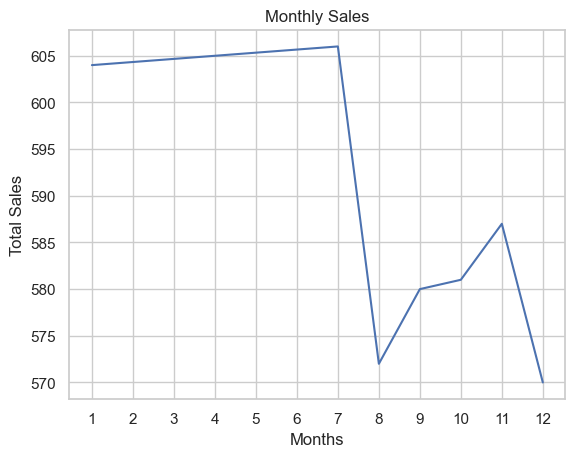

In [325]:
sales_by_month = df.groupby('Month').size()
plot_month = sales_by_month.plot(title = 'Monthly Sales', xticks = (1,2,3,4,5,6,7,8,9,10,11,12))
plot_month.set_xlabel('Months')
plot_month.set_ylabel('Total Sales')



This shows that from January to July the sales were almost steady but then something happened  and the sales declined rapidly. This can show that an investigation needs to be done on what changed around that time. This is how we explore our data and do investigations. Some assumptions would be that we changed the store's opening hours or that the vendors and suppliers had changed.

### Sales by Day

Text(0, 0.5, 'Total Sales')

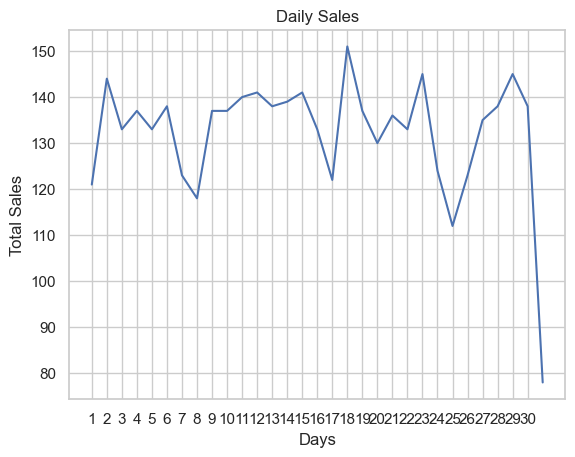

In [326]:
sales_by_month = df.groupby('Day').size()
plot_month = sales_by_month.plot(title = 'Daily Sales', xticks = (range(1,31)))
plot_month.set_xlabel('Days')
plot_month.set_ylabel('Total Sales')

Sales were fluctuating throughout the month but surprisingly there seems to be a significant drop at the end of the month. This is another point to investigate. I could assume that the sales would increase at the end of the month but this seems to be contrary. Finding the reason behind it can be very interesting. Do you have any assumptions?


### Sale by Hour


Text(0, 0.5, 'Total Sales')

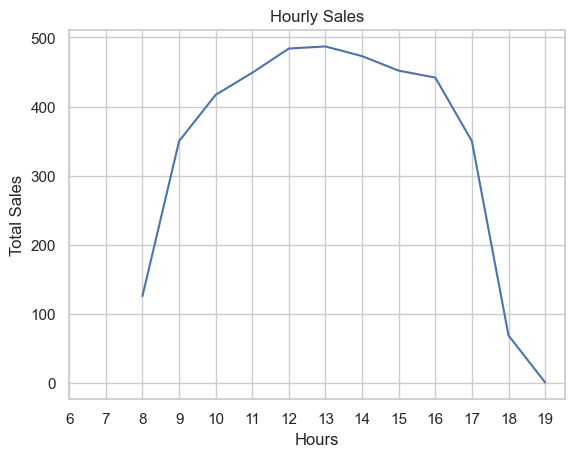

In [327]:

sales_by_month = df.groupby('Hour').size()
plot_month = sales_by_month.plot(title = 'Hourly Sales', xticks = (range(6,20)))
plot_month.set_xlabel('Hours')
plot_month.set_ylabel('Total Sales')

The sales seem to take a bell shape. The sales are highest from 11:00AM to 4:00PM. More customers are visiting in the afternoon rather than at the opening and closing times. This is useful information for the administration deptartment when it comes to managing staffing hours.


---

Great, now that we have some background in storytelling in EDA now let us begin from the top.


### Exploratory Data Analysis on the Balance data set

We have handled the balance data set before but we only handled missing values. We will now expand on this.

According to our rubric, we'll take the following steps. 

#### 1. What question are you trying to solve (or prove wrong)?

For this data set what we can build is a model that, according to the present variables, can predict the balance of future clients.


#### 2. What kind of data do you have?
Is your data numerical, categorical or something else? How do you deal with each kind?

As we can observe, we have 

Balance - [double][Continuous] The balance in the clients account

Income - [double][Continuous] The clients income.

Limit - [integer][Continuous] This is the credit card limit

Rating - [Double][Continuous] This is the Rating given to a client.

Cards - [Integer][Categorical] This is the number of cards the client 
has

Age -  [Integer][Categorical] This is the age of the client

Education - [Integer] [Categorical]This is the highest level of education attained by the client.

Gender - [String] [Categorical] Male or Female

Student - [String] [Categorical] Yes - the client is a student No - 
Client is not a student

Married -  [String] [Categorical] Yes - Client is married No - client is unmarried.

Ethnicity - [String] [Categorical] client can be Caucasion,Asian or African


In [328]:
balance = pd.read_csv('balance.txt', delim_whitespace=True)
balance.head(10)

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
1,23.283334,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
2,22.530409,104.593,7075,514,4,71,11,Male,No,No,Asian
3,27.652811,148.924,9504,681,3,36,11,Female,No,No,Asian
4,16.893978,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian
5,22.486178,80.180,8047,569,4,77,10,Male,No,No,Caucasian
6,10.574516,20.996,3388,259,2,37,12,Female,No,No,African American
7,14.576204,71.408,7114,512,2,87,9,Male,No,No,Asian
8,7.938090,15.125,3300,266,5,66,13,Female,No,No,Caucasian
9,17.756965,71.061,6819,491,3,41,19,Female,Yes,Yes,African American


#### 3. What’s missing from the data and how do you deal with?

What missing values are there?
Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

<Axes: >

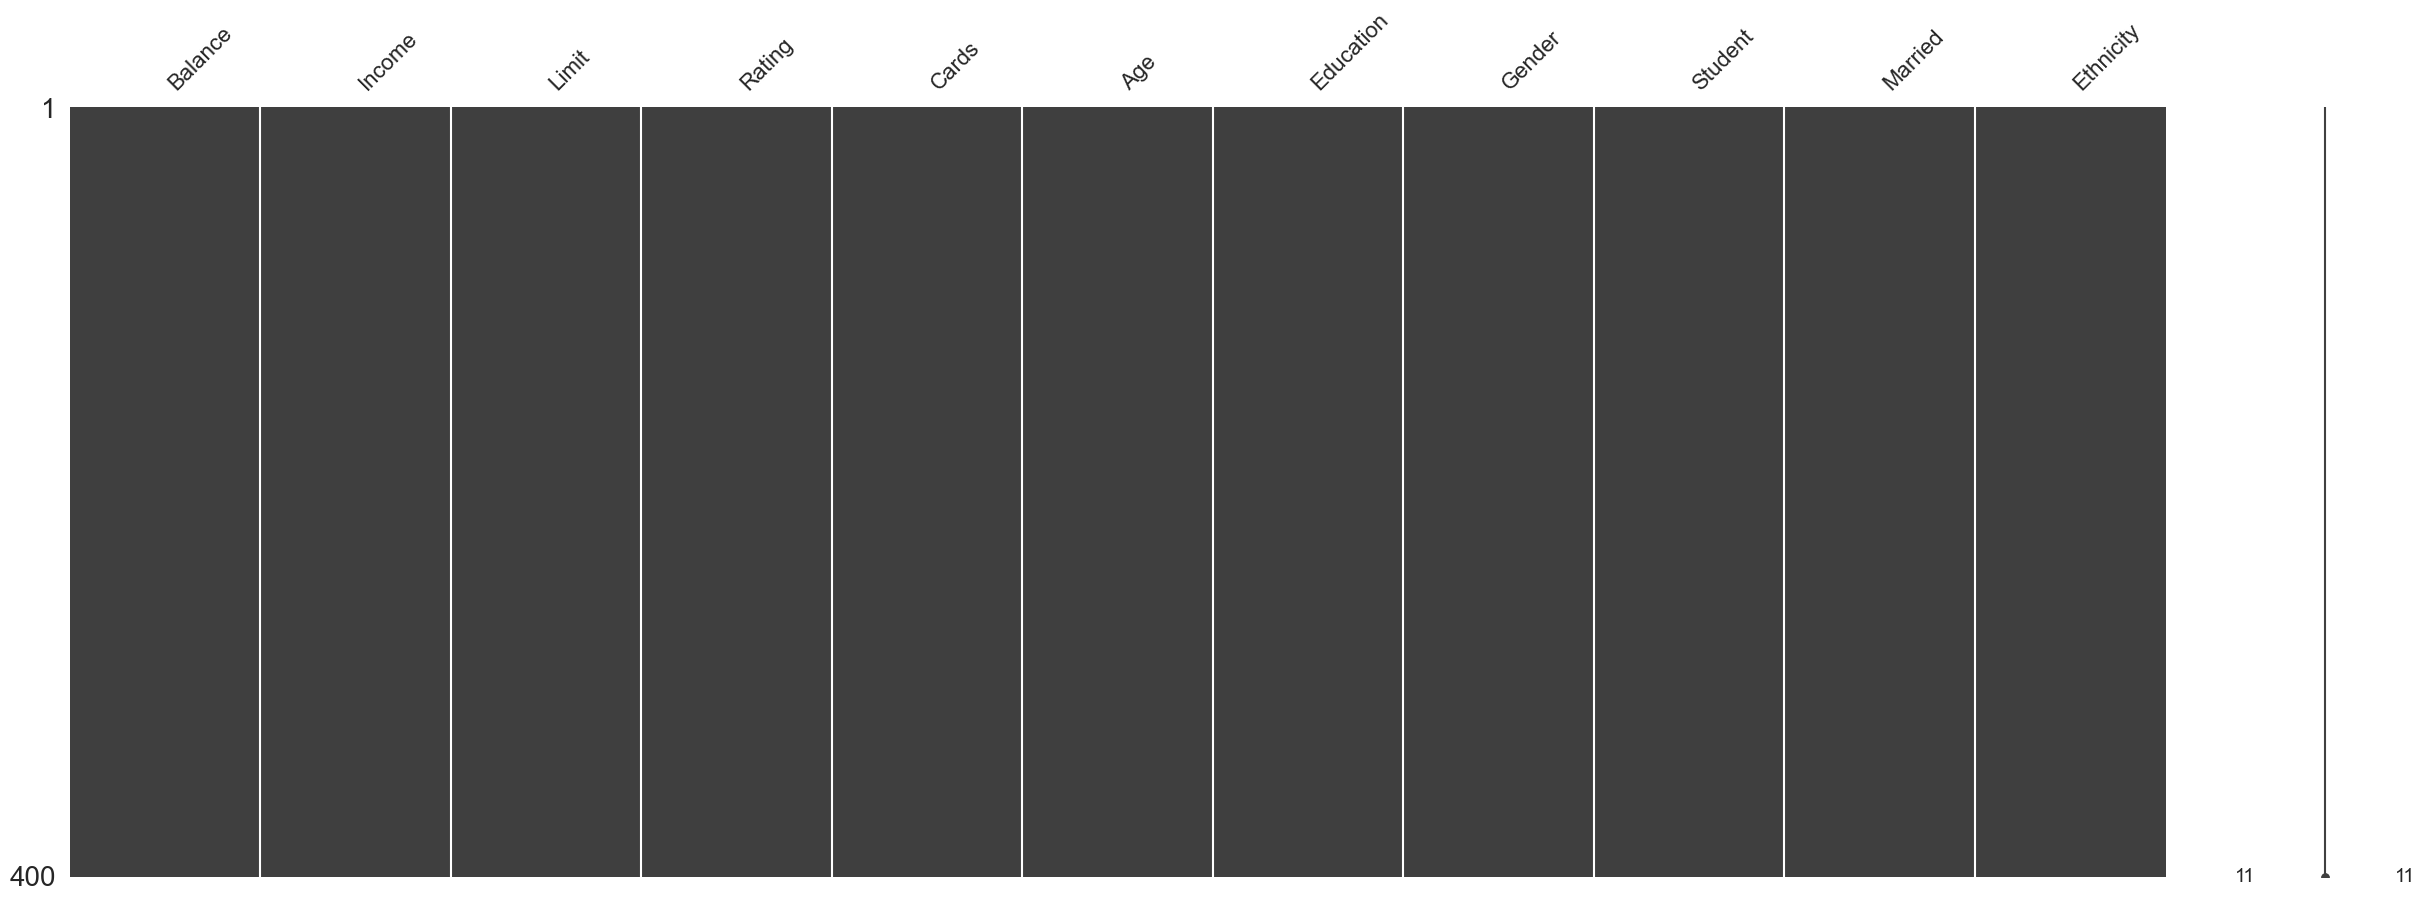

In [329]:
# Plot graphic of missing values
missingno.matrix(balance, figsize = (30,10))

We can now visualise the missing data and start strategising. We handled missing data in this data set in the previous task so if you need any refreshers refer to the previous task. 


#####  4. Where are the outliers and why should pay attention to them?

To perform our data analysis, let's create two new dataframes.

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.



In [330]:
df_bin = balance      # for discretised continuous variables
df_con = balance      # for continuous variables

Let's explore each of these features individually.

We'll go through each column iteratively and see which ones to use in our first models. Some may need more preprocessing than others to get ready.

Gender
Female    207
Male      193
Name: count, dtype: int64


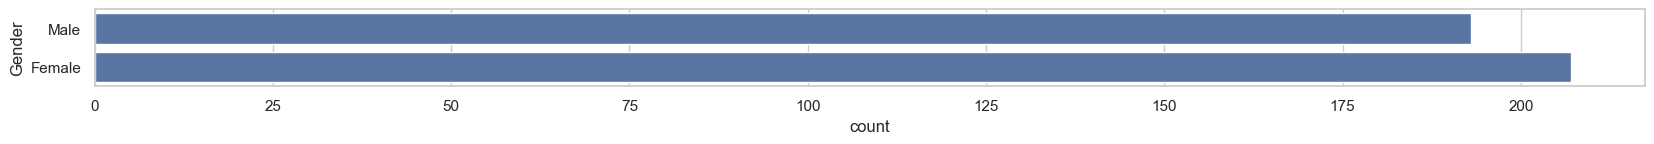

In [331]:
# How many clients are Male and Female
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Gender', data=df_bin)
print(df_bin.Gender.value_counts())

We can see that we have a little more females than male. This could be a coincidence or could be a real representation of the banks client list. Though the difference is not that significant.

<Axes: xlabel='count', ylabel='Cards'>

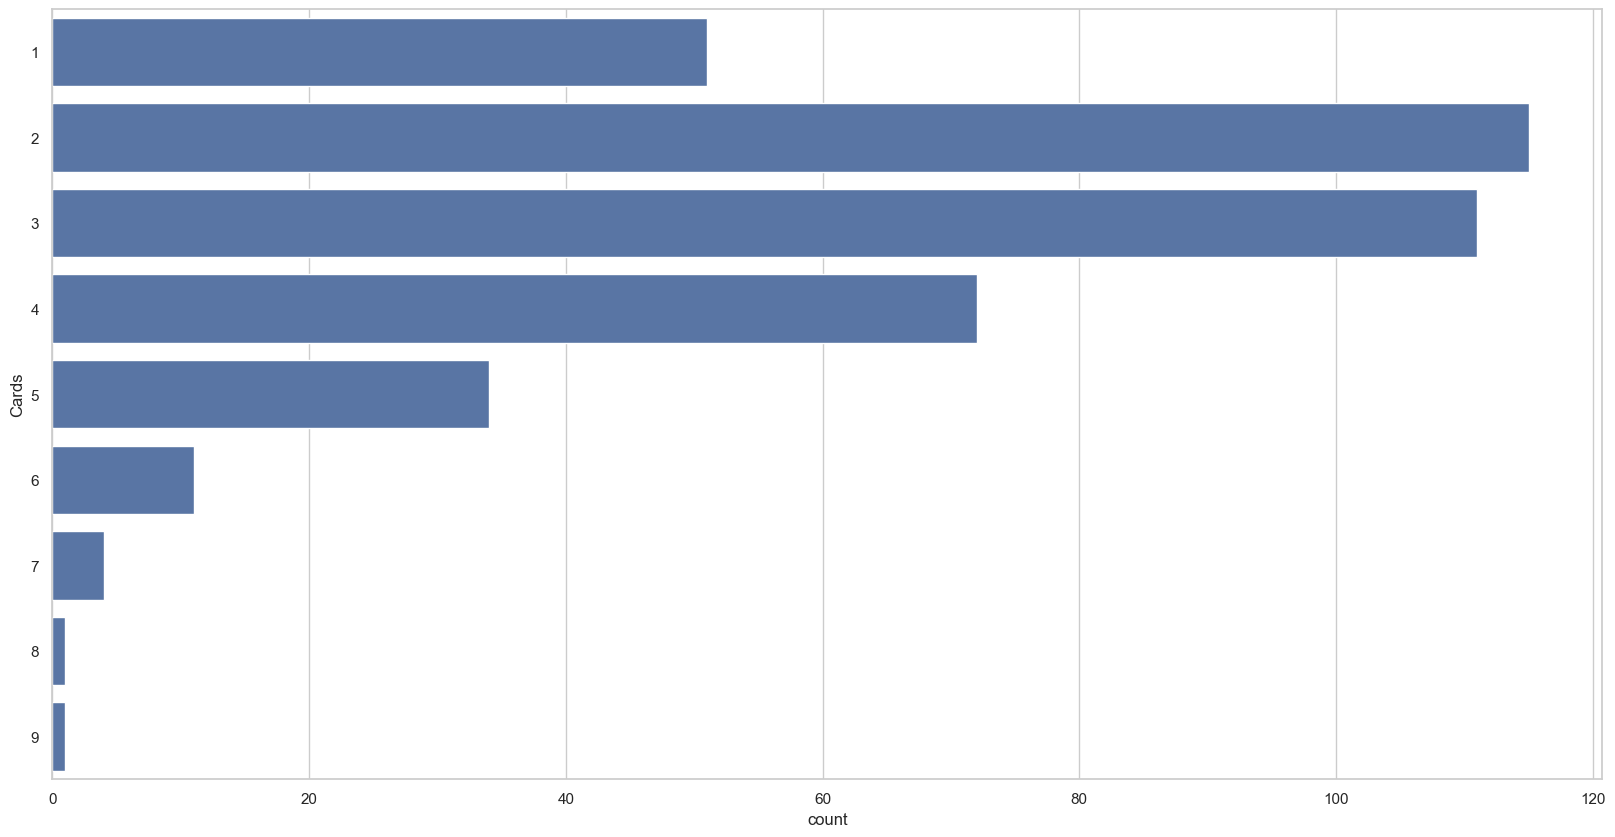

In [332]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_bin['Cards'], data=df_bin)

We can see with this feature, the values are numerical (1, 2 upto 8) but they are categories.

We can deduce that most clients have 2 to three 3 cards. An important thing to note is the average balance or income for every category.




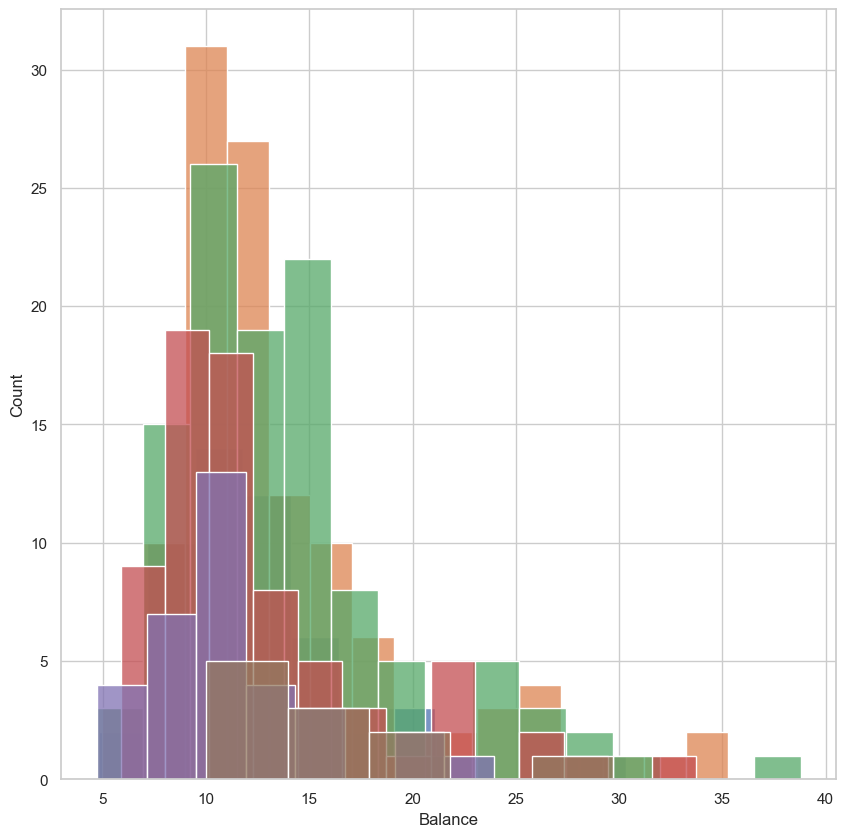

In [333]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Cards'] == 1]['Balance'], kde_kws={'label': 'Cards = 1'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 2]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 3]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 4]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 5]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 6]['Balance'], kde_kws={'label': 'Cards = 2'});




The plot above allows us to see that having different number of cards can be able to describe to us the balance that a client may have. 

In [334]:
## Fill in the same analysis for for the categorical variables 
# Student, Married and Ethnicity with corresponding plots and story lines








#### 5. How can you add, change or remove features to get more out of your data?


Now let us look at the age variable, I would like to say that it is a category variable but it has too many categories. Let up plot this to prove it.

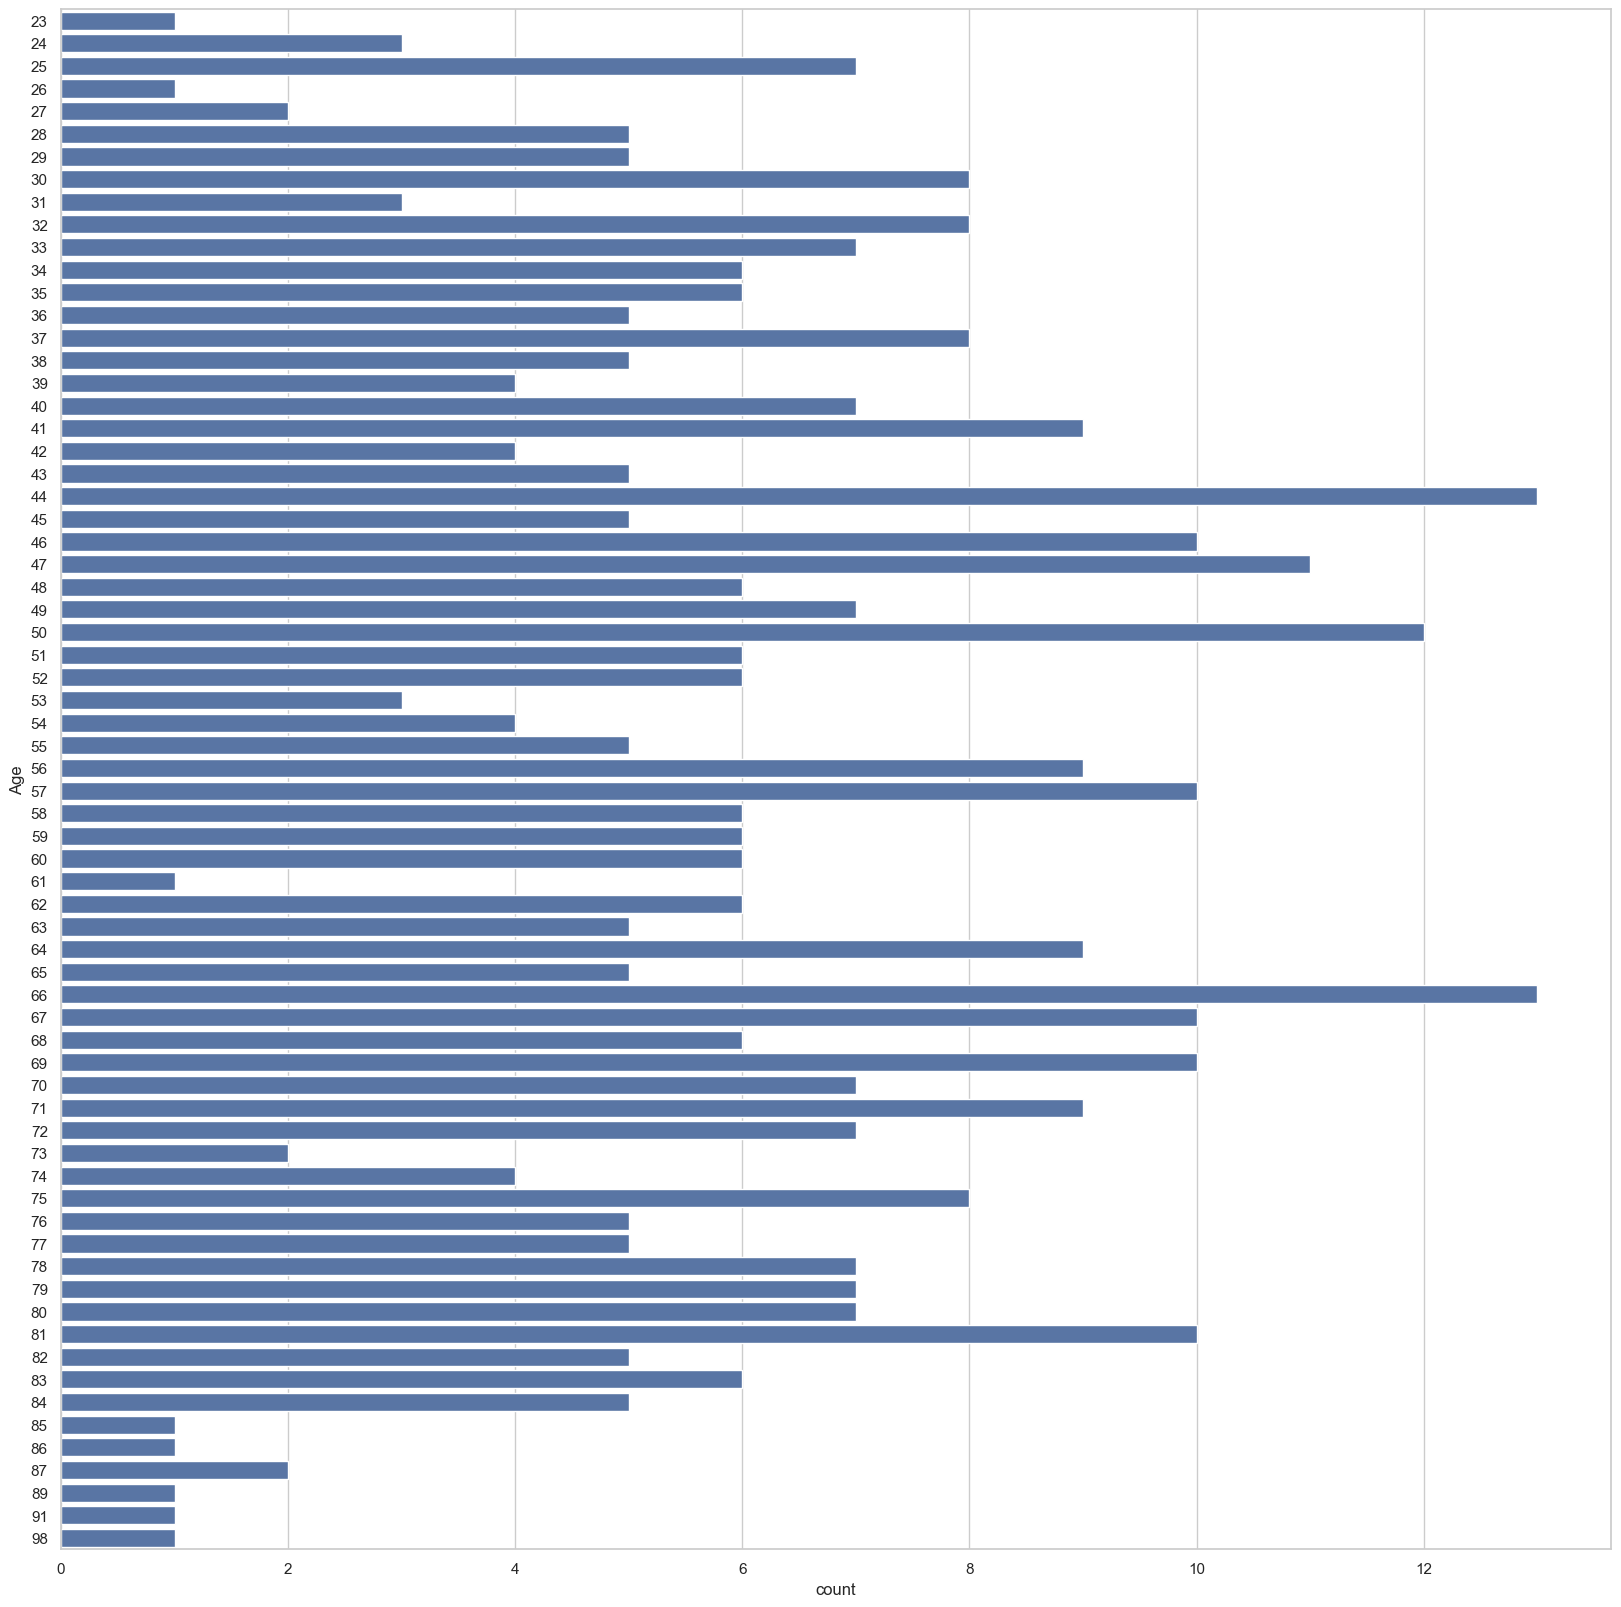

In [335]:
fig = plt.figure(figsize=(20,20))
sns.countplot(y=df_bin['Age'], data=df_bin);

These are so many categories to analyse. Some categorical variables such as this can be put into groups. Since we are dealing with age, let us try and put the clients into age groups. We can do this by putting them into age groups of 10 or 5 years. For this analysis let us do so for 10 years. So we will start with age group 20-29 then 30-39 and so on.

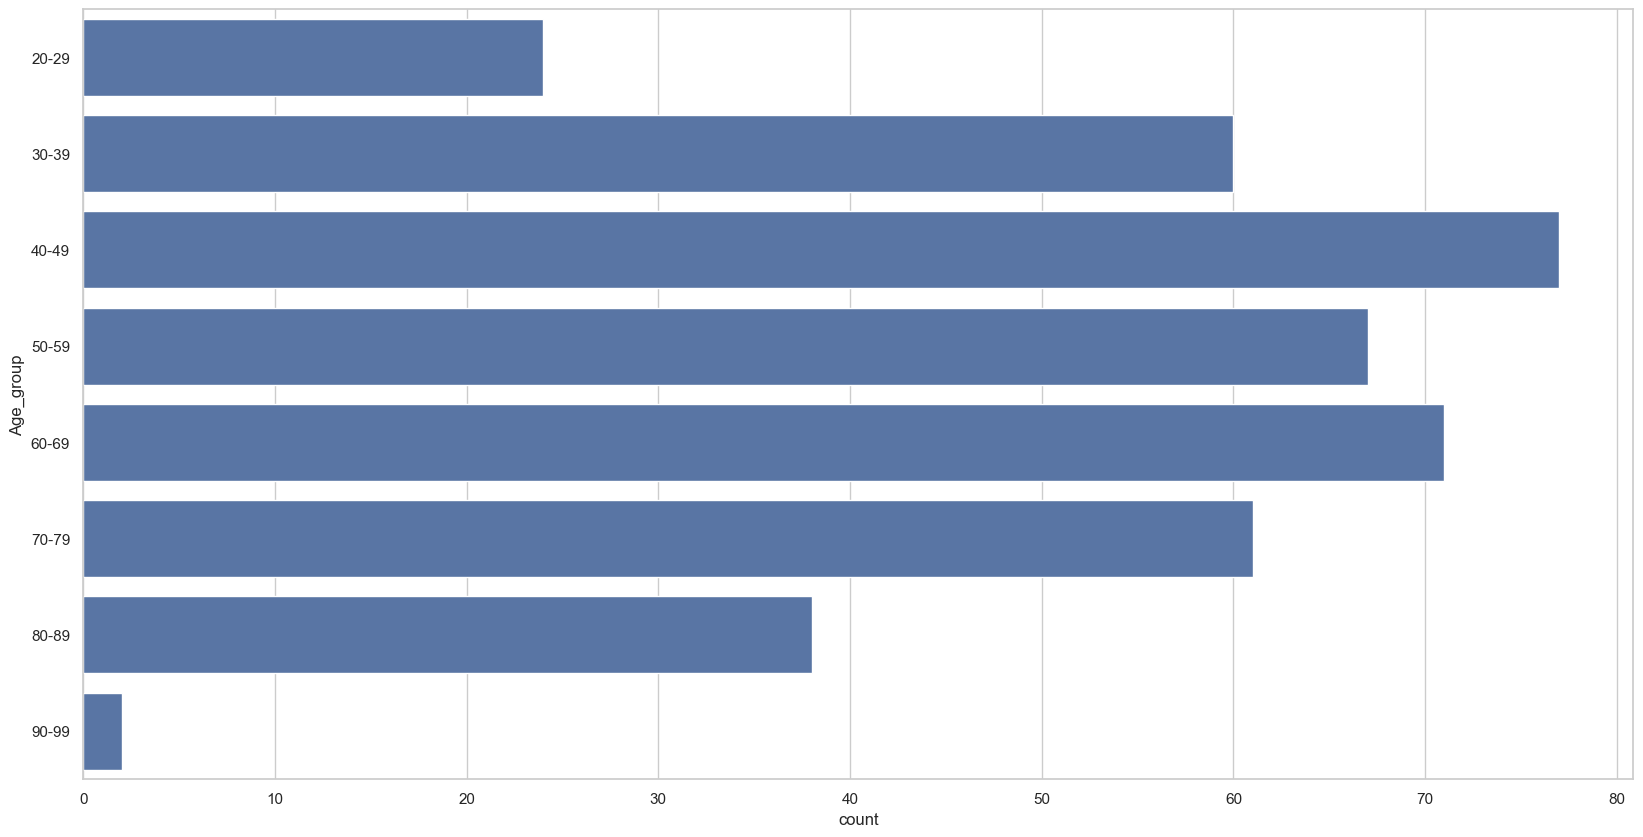

In [336]:
df_bin['Age_group'] = pd.cut(df_bin['Age'], [20,29,39,49,59,69,79,89,99], 
                   labels=['20-29','30-39','40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_bin['Age_group'], data=df_bin);


Great! Now the categories above make more sense and can be used for analysis. Majority of the Bank's clients are between the ages of 30 to 79. Feel free to practice with other comparison variables, such as number of cards in each age group or even gender.

We will do the analysis of age groups with Balance and Income.

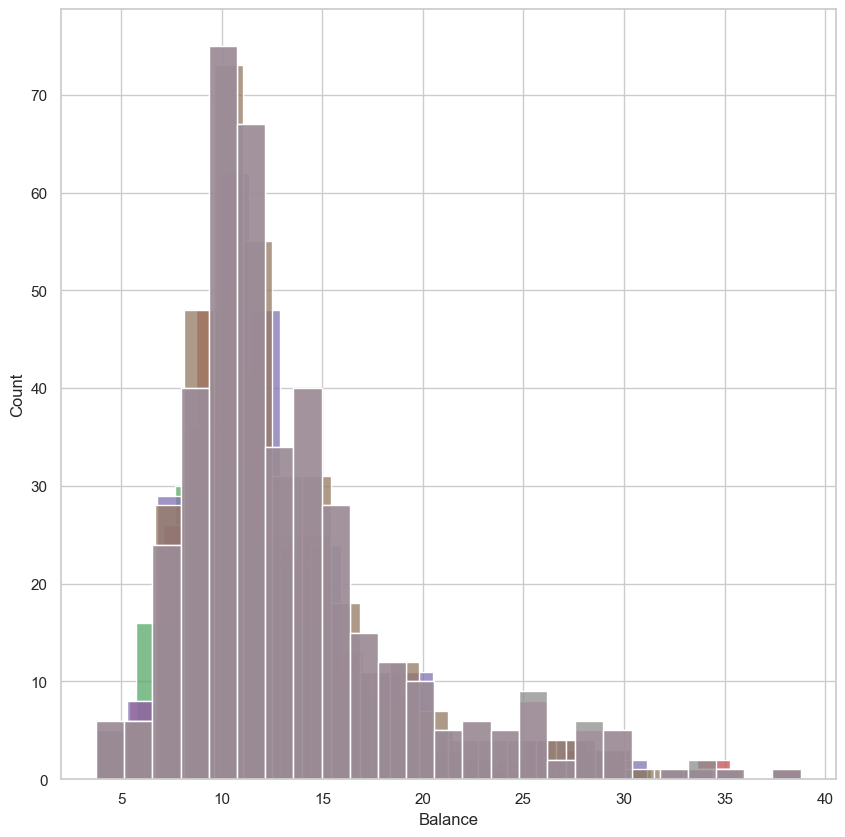

In [337]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Age'] < 29 ]['Balance'], kde_kws={'label': 'Age < 29'});
sns.histplot(df_bin.loc[df_bin['Age'] < 39 ]['Balance'], kde_kws={'label': 'Age < 39'});
sns.histplot(df_bin.loc[df_bin['Age'] < 49 ]['Balance'], kde_kws={'label': 'Age < 49'});
sns.histplot(df_bin.loc[df_bin['Age'] < 59 ]['Balance'], kde_kws={'label': 'Age < 59'});
sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Balance'], kde_kws={'label': 'Age < 69'});
sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Balance'], kde_kws={'label': 'Age < 79'});
sns.histplot(df_bin.loc[df_bin['Age'] < 89 ]['Balance'], kde_kws={'label': 'Age < 89'});
sns.histplot(df_bin.loc[df_bin['Age'] < 99 ]['Balance'], kde_kws={'label': 'Age < 99'});




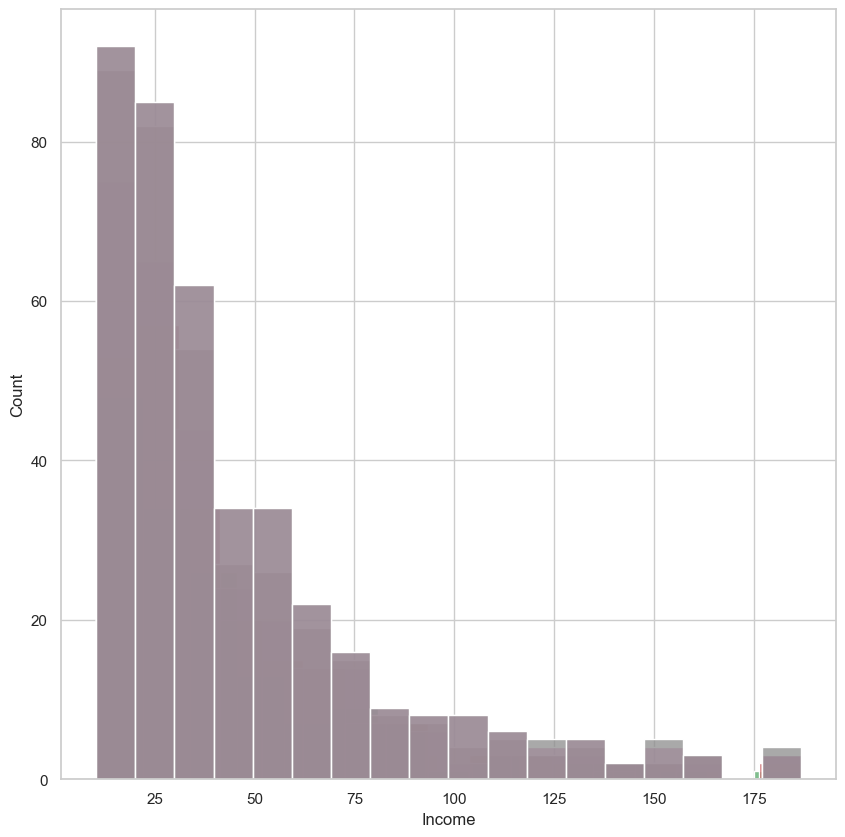

In [338]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Age'] < 29 ]['Income'], kde_kws={'label': 'Age < 29'});
sns.histplot(df_bin.loc[df_bin['Age'] < 39 ]['Income'], kde_kws={'label': 'Age < 39'});
sns.histplot(df_bin.loc[df_bin['Age'] < 49 ]['Income'], kde_kws={'label': 'Age < 49'});
sns.histplot(df_bin.loc[df_bin['Age'] < 59 ]['Income'], kde_kws={'label': 'Age < 59'});
sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Income'], kde_kws={'label': 'Age < 69'});
sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Income'], kde_kws={'label': 'Age < 79'});
sns.histplot(df_bin.loc[df_bin['Age'] < 89 ]['Income'], kde_kws={'label': 'Age < 89'});
sns.histplot(df_bin.loc[df_bin['Age'] < 99 ]['Income'], kde_kws={'label': 'Age < 99'});




Clearly different age groups have different ranges of incomes and balances that can be further explored by Gender, Ethnicity and the cycle continues..

Ultimately, there’s no limit to the number of experiments one can perform in the EDA process – it completely depends on what you’re analysing, as well as the knowledge of packages such as Pandas and matplotlib our job becomes easier.



## Compulsory Task 

Use the Titanic dataset provided to perform your analysis. Provide an indepth and creative EDA on the data set.

# **Exploratory Data Analysis for Titanic Data Set**

In [339]:
# Importing the required libraries for EDA.
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [340]:
# Loading the data into the data frame.
df_titanic = pd.read_csv("Titanic.csv", header=0)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [341]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [342]:
# Checking informations about data set.
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [343]:
# Statistics.
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [344]:
df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [345]:
# Shape of the data set.
df_titanic.shape


(891, 12)

In [346]:
# Missing value percentage.
(df_titanic.isnull().sum())/(len(df_titanic))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

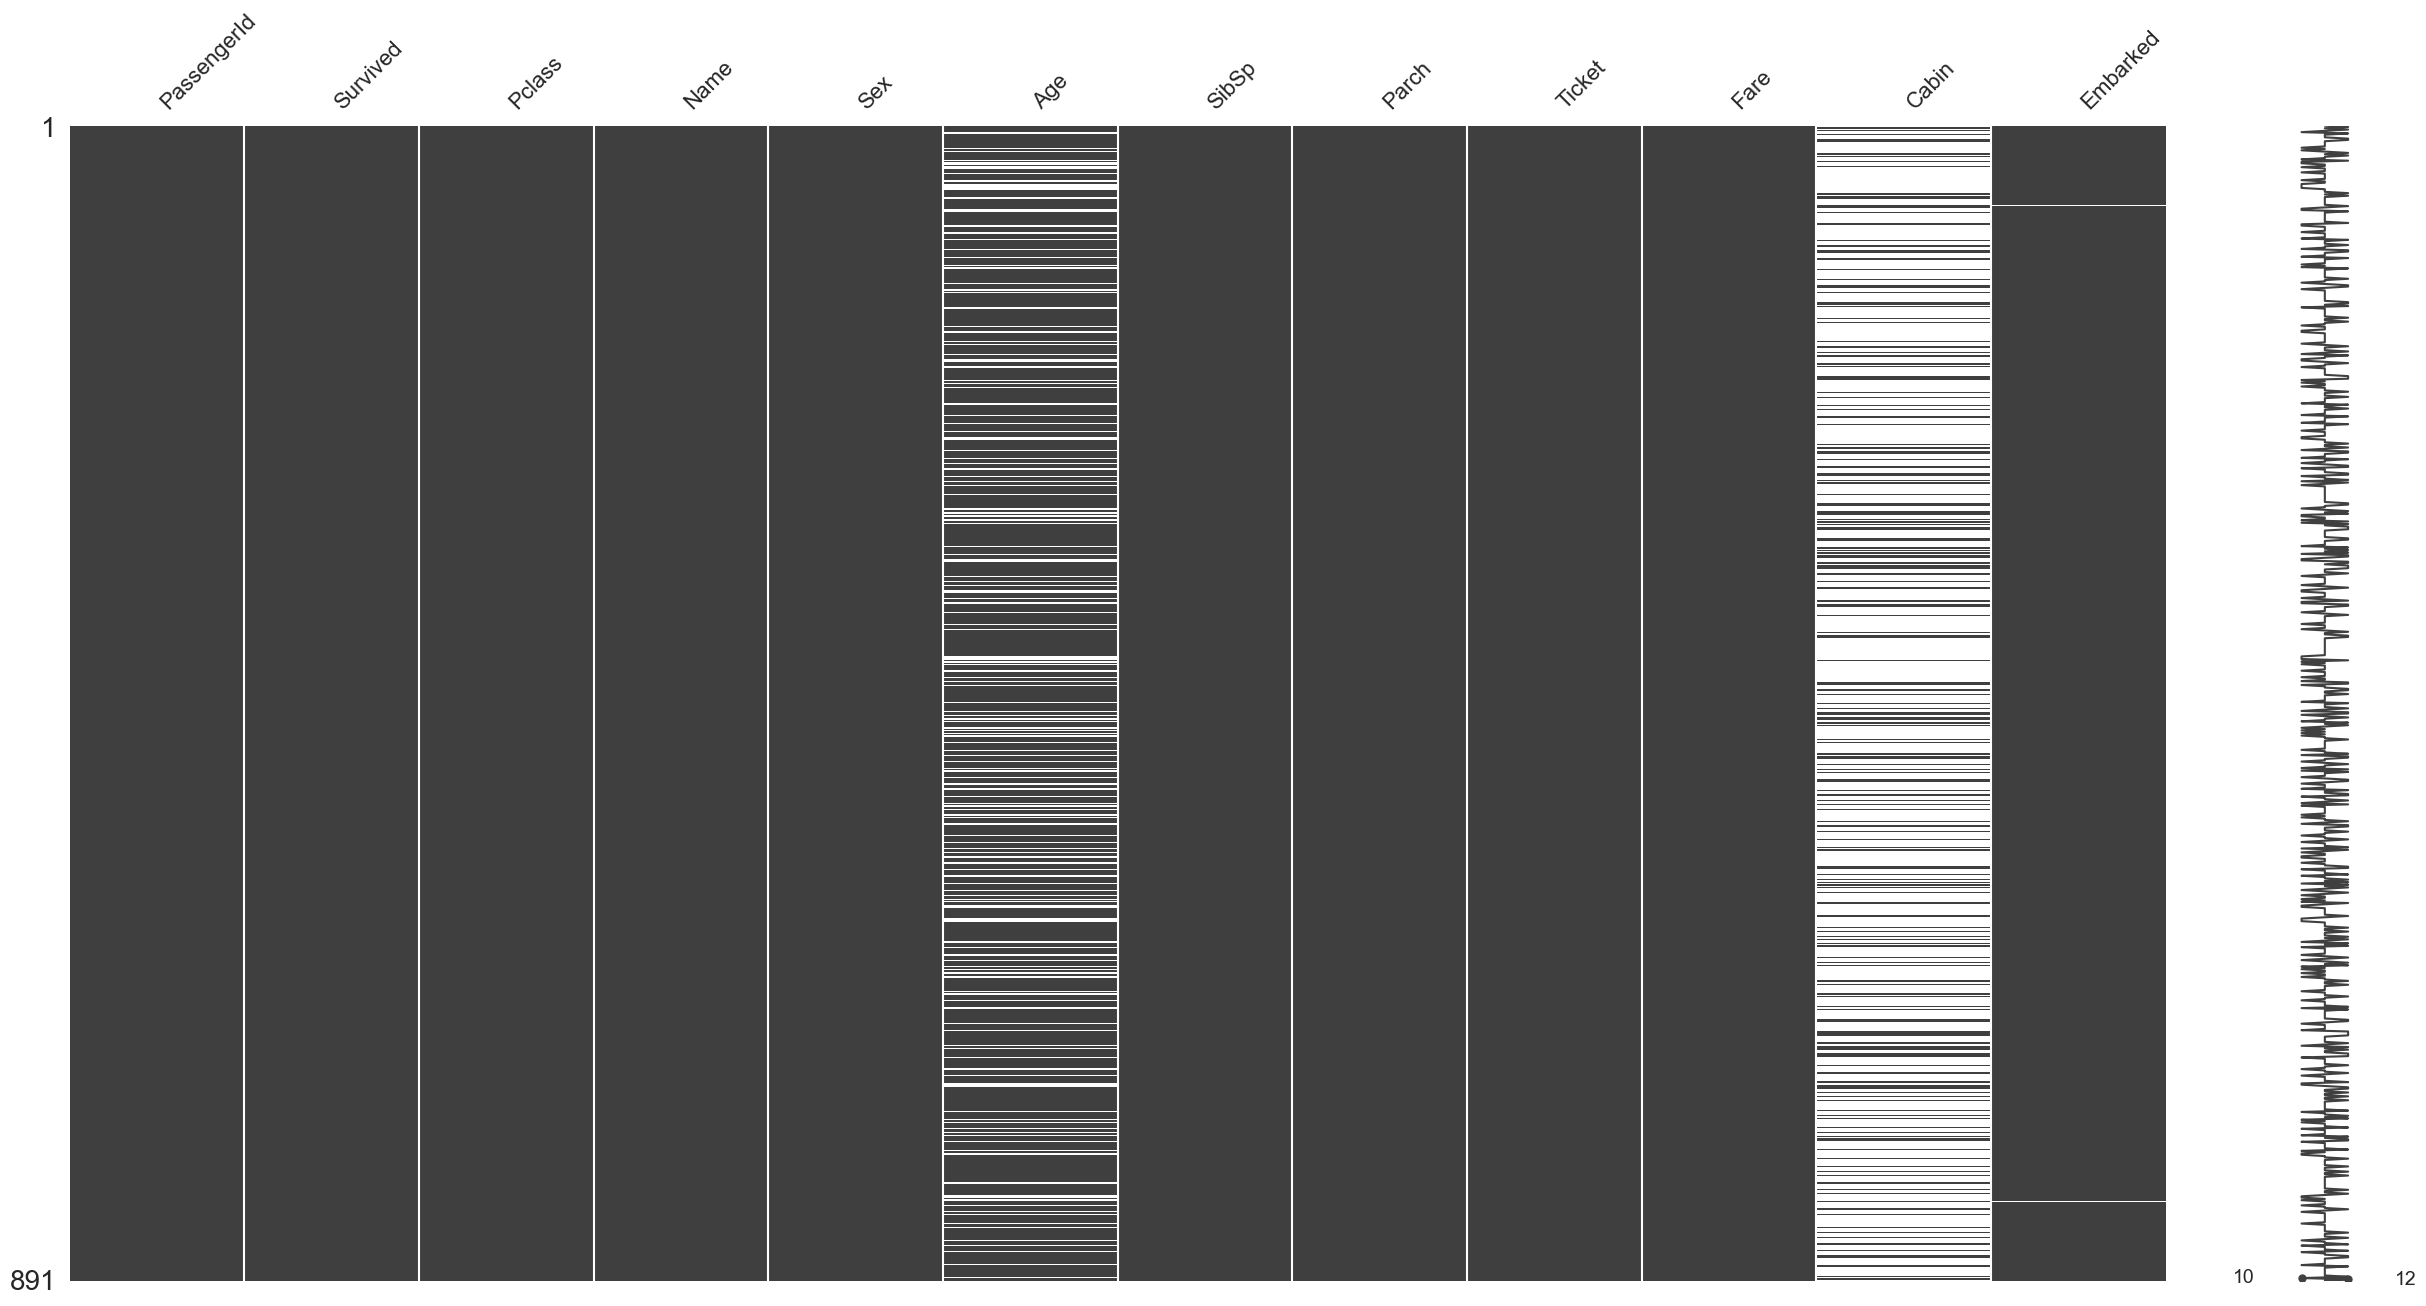

In [347]:
# Plotting graphic of missing values.
missingno.matrix(df_titanic, figsize = (30,15))

In [348]:
# Dropping columns which is not necessary.
df_titanic.drop(
    ['PassengerId', 'Name', 'Cabin','Ticket'], axis=1, inplace=True
)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [349]:
# Creating new feature.
df_titanic['Family'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1
df_titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df_titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [350]:
# Checking duplicates.
df_titanic.duplicated().sum()

112

In [351]:
# Removing duplicates.
df_titanic.drop_duplicates(inplace=True)
df_titanic.duplicated().sum()

0

In [352]:
# Imputing missing values for 'Age' with the median.
age_imputer = SimpleImputer(strategy='median')
df_titanic['Age'] = age_imputer.fit_transform(df_titanic[['Age']])

# Imputing missing values for 'Embarked' with the mode.
embarked_mode = df_titanic['Embarked'].mode()[0]
df_titanic['Embarked'].fillna(embarked_mode, inplace=True)

df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [353]:
# Identifying categorical columns.
categorical_columns = df_titanic.select_dtypes(include=['object']).columns
categorical_columns

Index(['Sex', 'Embarked'], dtype='object')

In [354]:
# One hot encoding for Sex and Embarked columns.
one_hot_encoded_data = pd.get_dummies(df_titanic, columns=['Sex', 'Embarked'])
one_hot_encoded_data.head()

,Survived,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,False,True,False,False,True
1,1,1,38.0,71.2833,2,True,False,True,False,False
2,1,3,26.0,7.9250,1,True,False,False,False,True
3,1,1,35.0,53.1000,2,True,False,False,False,True
4,0,3,35.0,8.0500,1,False,True,False,False,True


<Figure size 1200x400 with 0 Axes>

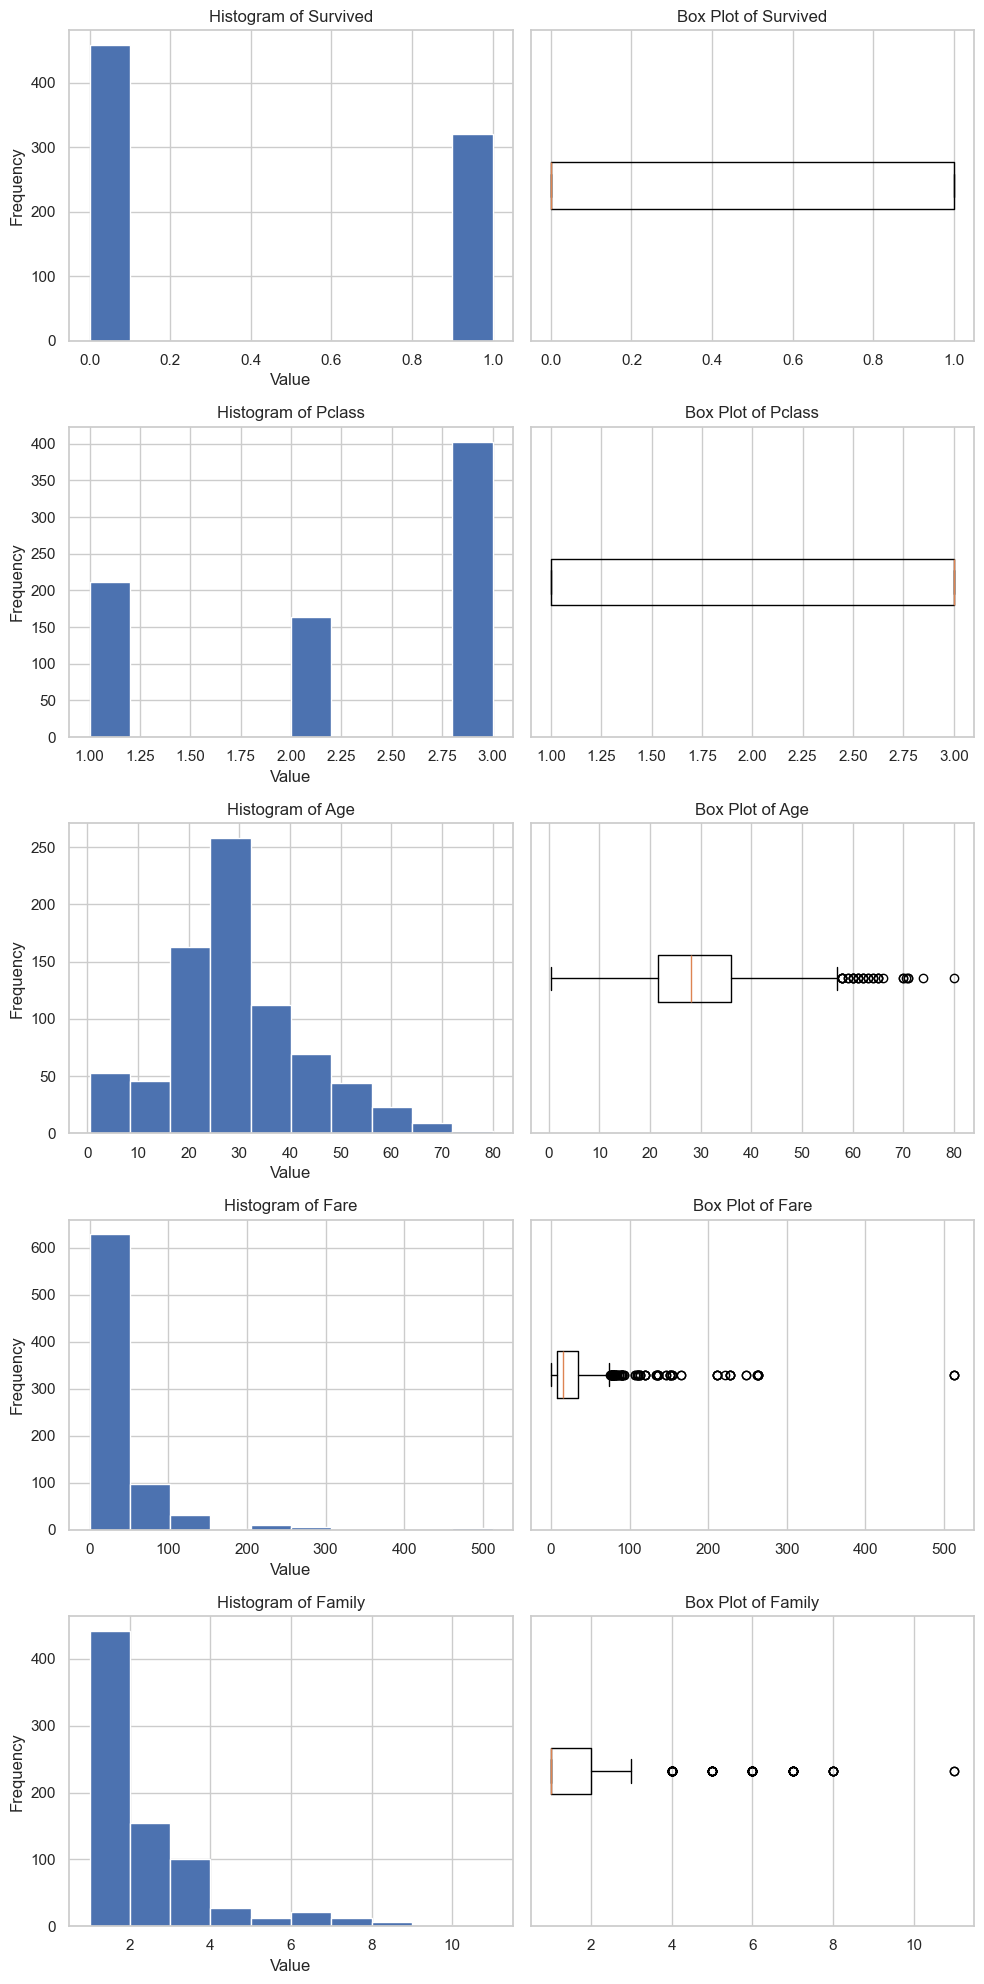

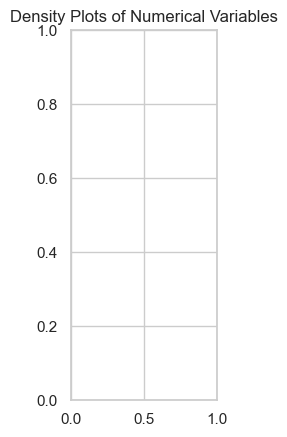

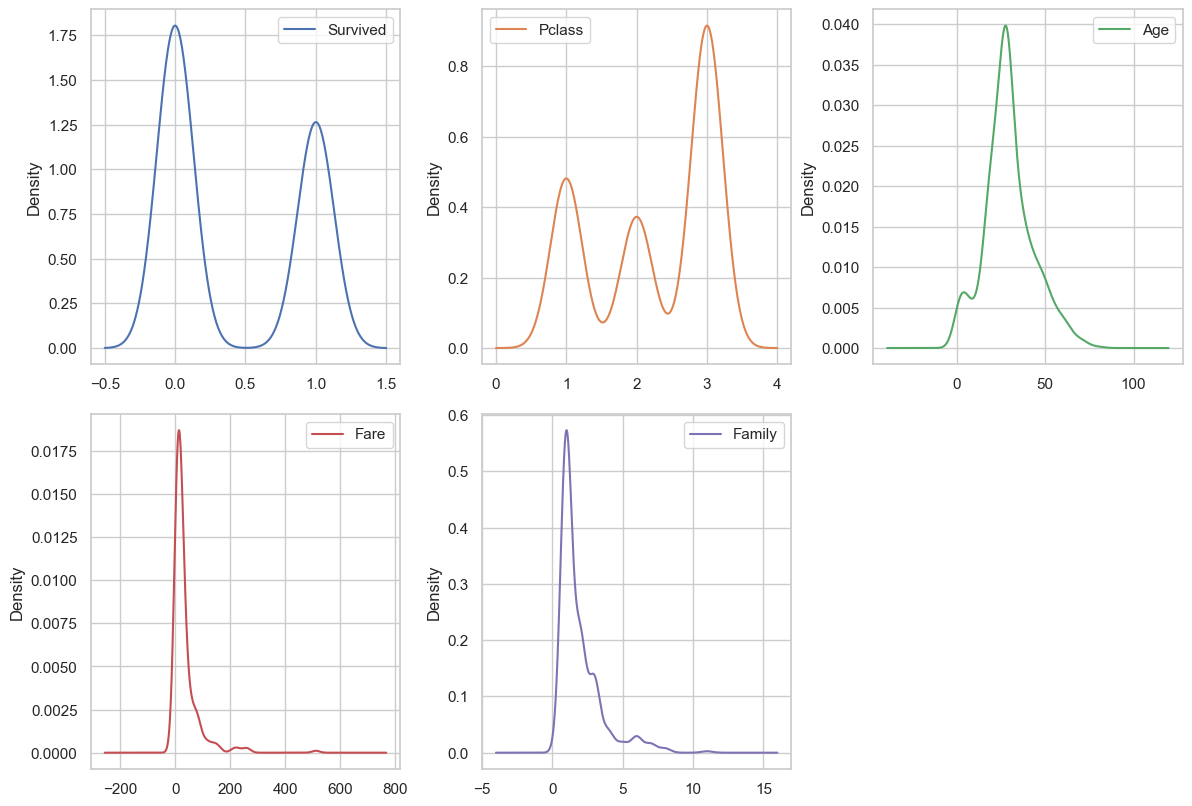

In [355]:
# Data Visualization.
# Creating histograms, box plots, and density plots for numerical 
# variables.
plt.figure(figsize=(12, 4))

# Getting numerical features.
numerical_features = one_hot_encoded_data.select_dtypes(
    include=[np.number]
).columns

# Creating a figure and axes with subplots.
fig, axes = plt.subplots(
    len(numerical_features), 2, figsize=(10, 4*len(numerical_features))
) 

for i, feature in enumerate(numerical_features):
    # Plotting histogram on the left (column 0).
    axes[i, 0].hist(one_hot_encoded_data[feature])
    axes[i, 0].set_title(f'Histogram of {feature}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Plotting box plot on the right (column 1).
    axes[i, 1].boxplot(one_hot_encoded_data[feature], vert=False)
    axes[i, 1].set_title(f'Box Plot of {feature}')
    axes[i, 1].set_yticks([]) 

plt.tight_layout()
plt.show()
plt.subplot(1, 3, 3)
plt.title('Density Plots of Numerical Variables')
one_hot_encoded_data.plot(
    kind='density', 
    subplots=True, layout=(3, 3), sharex=False, figsize=(12, 12)
)
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

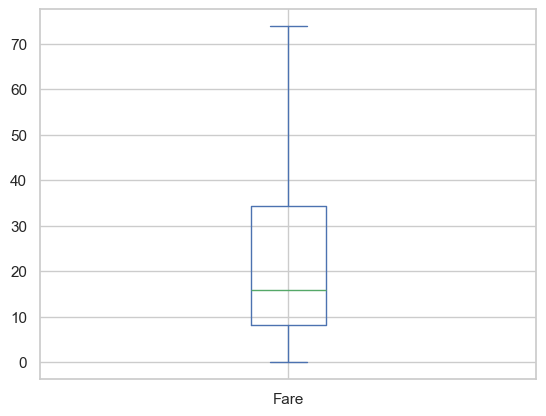

In [381]:
# Handling outliers in Fare.
Q1 = one_hot_encoded_data['Fare'].quantile(0.25)
Q3 = one_hot_encoded_data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

one_hot_encoded_data['Fare'] = np.where(one_hot_encoded_data['Fare'] < lower_bound, lower_bound, one_hot_encoded_data['Fare'])
one_hot_encoded_data['Fare'] = np.where(one_hot_encoded_data['Fare'] > upper_bound, upper_bound, one_hot_encoded_data['Fare'])

one_hot_encoded_data['Fare'].plot(kind='box')
plt.show()

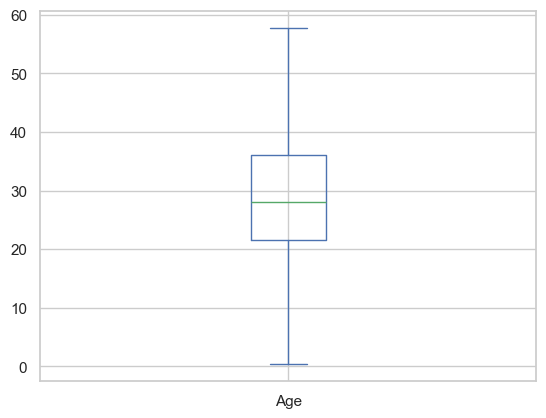

In [382]:
# Handling outliers in Age.
Q1 = one_hot_encoded_data['Age'].quantile(0.25)
Q3 = one_hot_encoded_data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

one_hot_encoded_data['Age'] = np.where(one_hot_encoded_data['Age'] < lower_bound, lower_bound, one_hot_encoded_data['Age'])
one_hot_encoded_data['Age'] = np.where(one_hot_encoded_data['Age'] > upper_bound, upper_bound, one_hot_encoded_data['Age'])

one_hot_encoded_data['Age'].plot(kind='box')
plt.show()

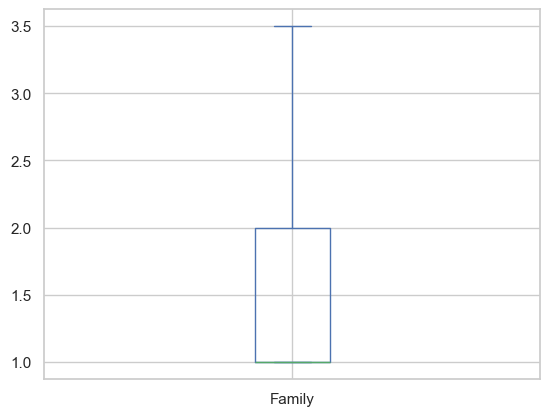

In [383]:
# Handling outliers in Family.
Q1 = one_hot_encoded_data['Family'].quantile(0.25)
Q3 = one_hot_encoded_data['Family'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

one_hot_encoded_data['Family'] = np.where(one_hot_encoded_data['Family'] < lower_bound, lower_bound, one_hot_encoded_data['Family'])
one_hot_encoded_data['Family'] = np.where(one_hot_encoded_data['Family'] > upper_bound, upper_bound, one_hot_encoded_data['Family'])

one_hot_encoded_data['Family'].plot(kind='box')
plt.show()

<Figure size 5000x3000 with 0 Axes>

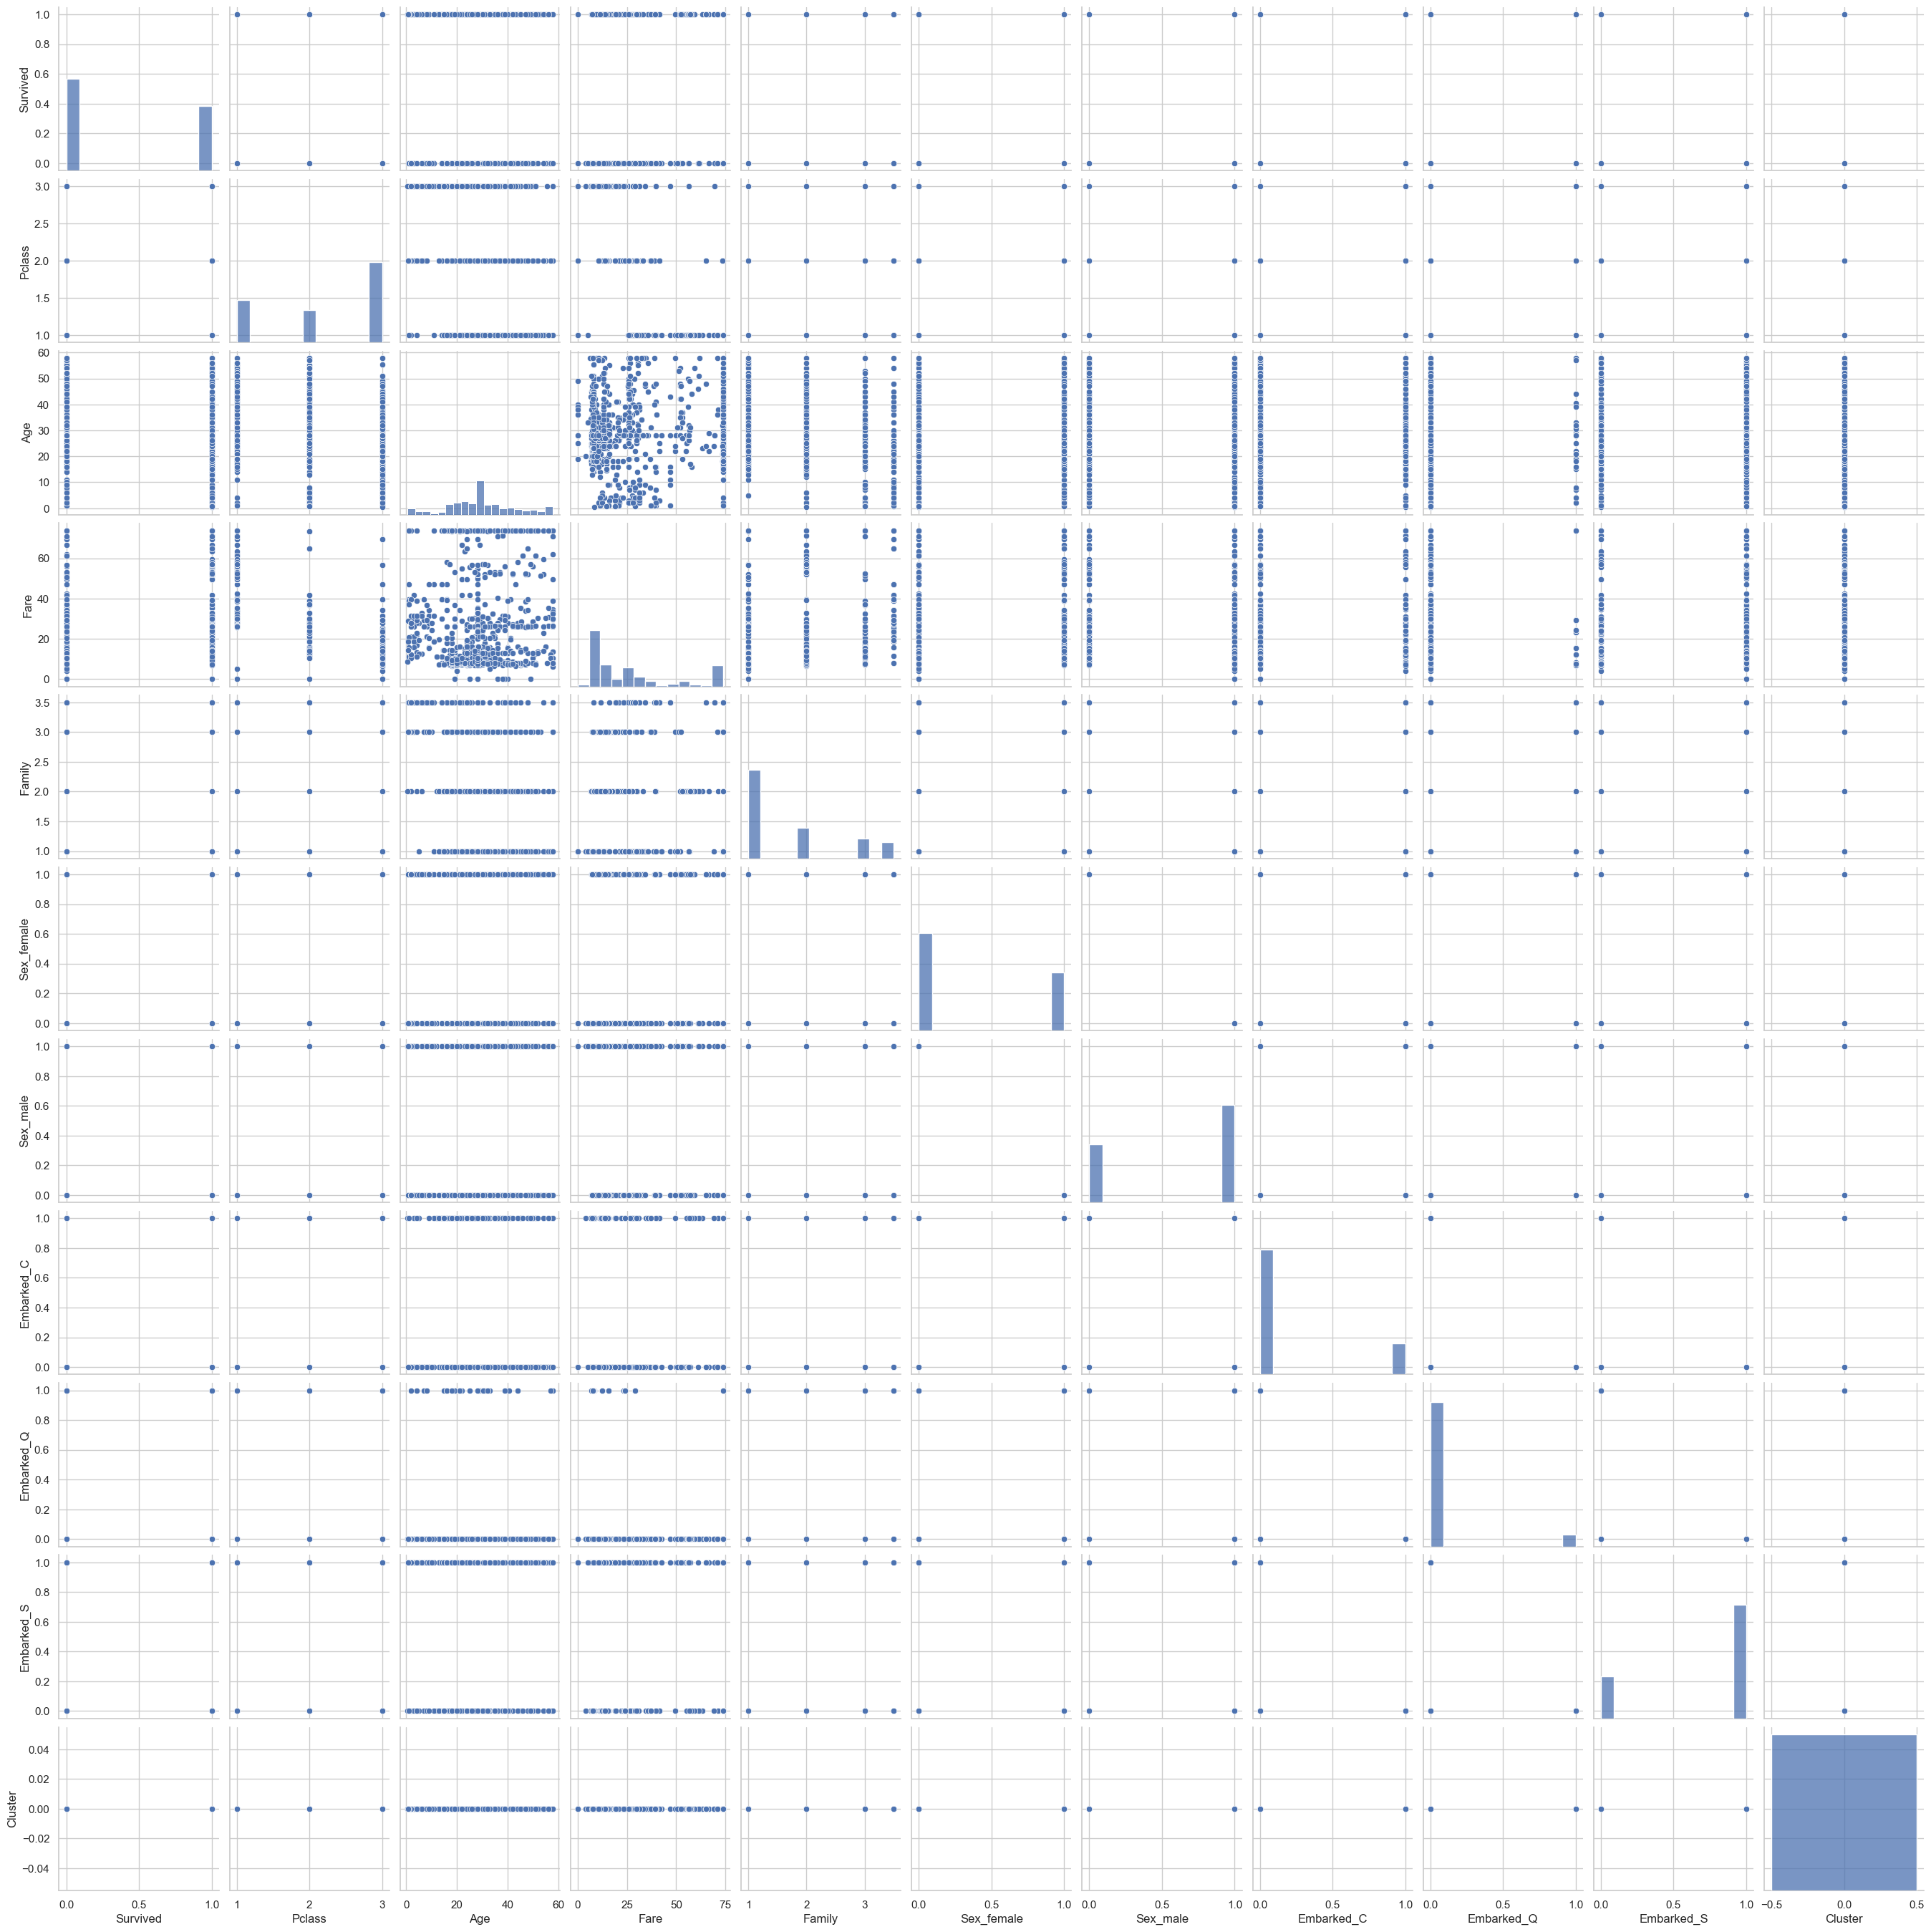

In [384]:
# Creating pairplot to visualize the relationship between pairs of 
# variables.
plt.figure(figsize=[50,30])
sns.pairplot(one_hot_encoded_data)
plt.show()

/var/folders/1d/rdd8p1pj3fdgs03vysqjbk7c0000gn/T/ipykernel_1026/3852686560.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


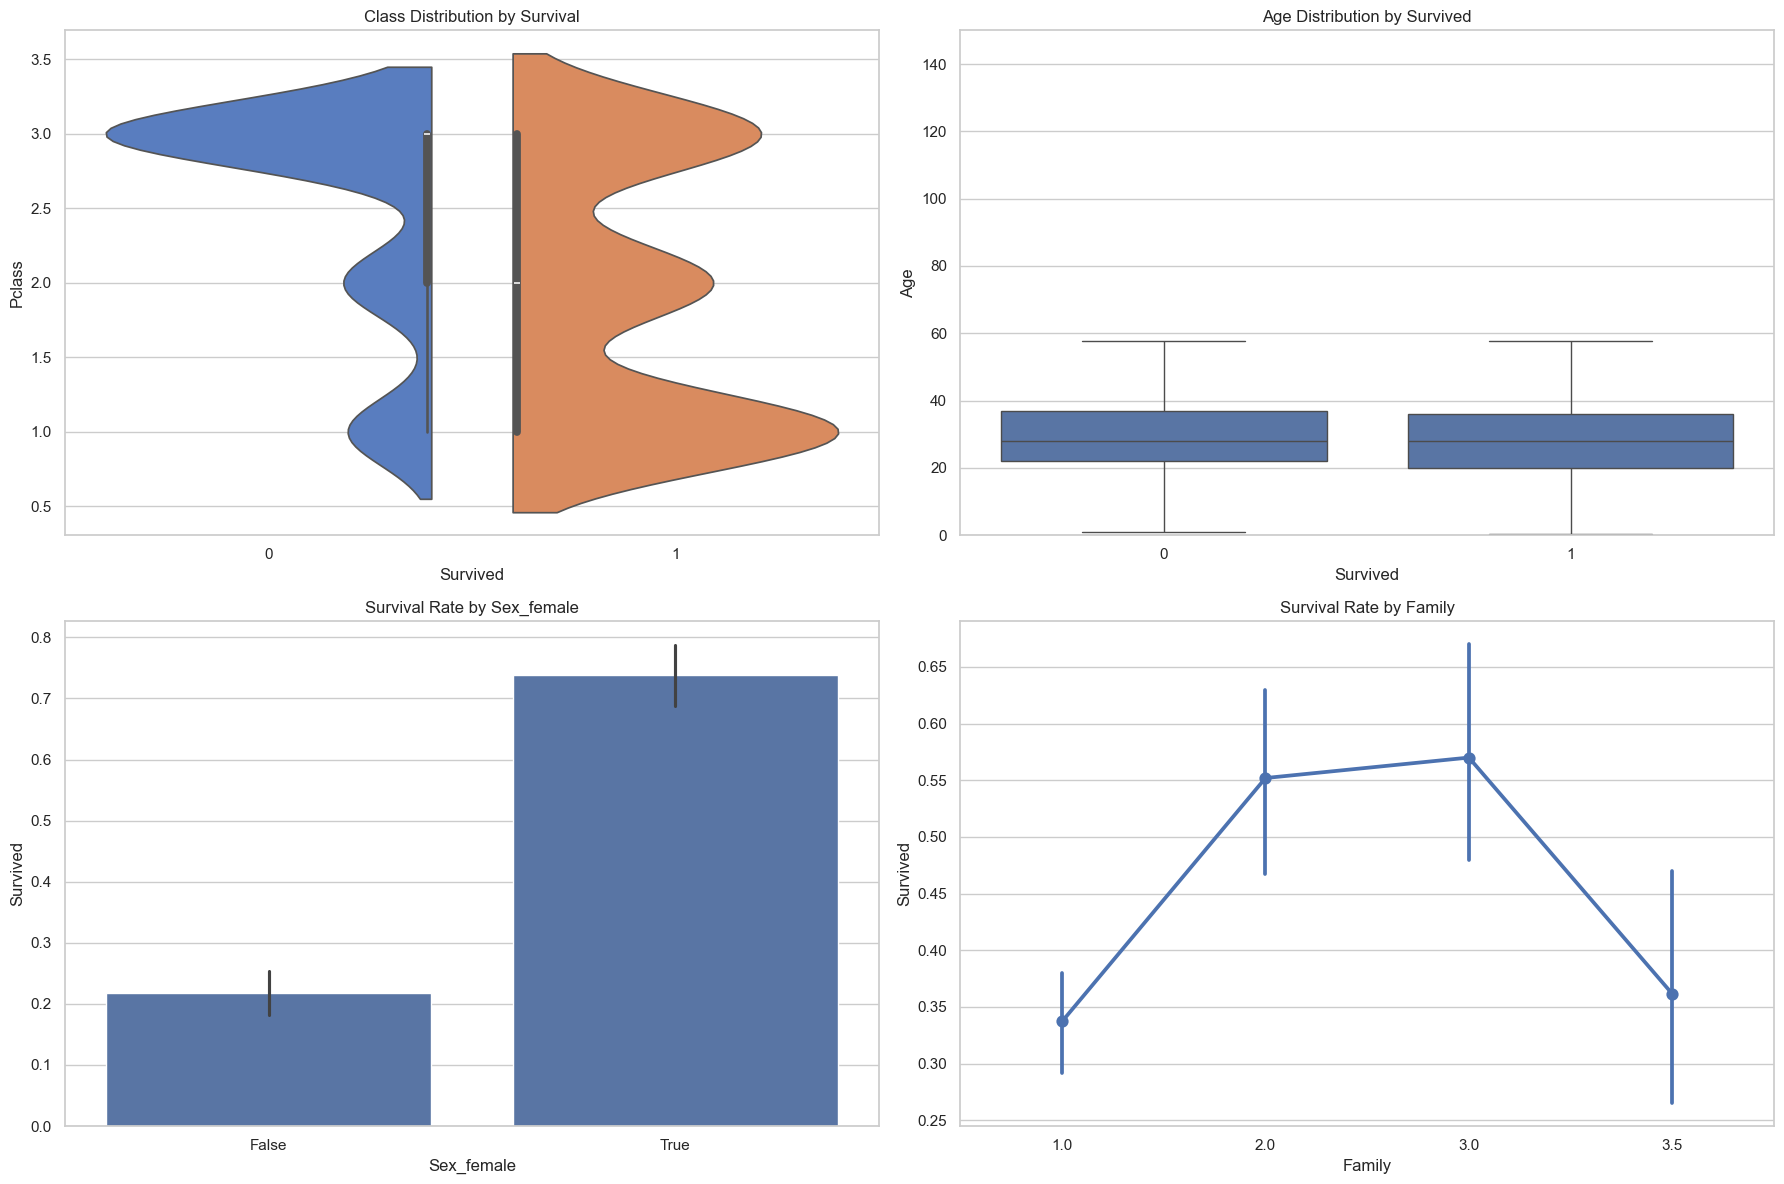

In [385]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Violin plot for Class distribution by Survival.
sns.violinplot(
    x="Survived", 
    y="Pclass", 
    data=one_hot_encoded_data, 
    palette="muted", 
    split=True, 
    ax=axes[0, 0]
)
axes[0, 0].set_title('Class Distribution by Survival')

# Box plot of Age by Survived.
sns.boxplot(x="Survived", y="Age", data=one_hot_encoded_data, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Survived')
axes[0, 1].set_ylim(0, 150) 

# Survival rate by Sex.
sns.barplot(
    x="Sex_female",
    y="Survived", 
    data=one_hot_encoded_data, 
    ax=axes[1, 0]
)
axes[1, 0].set_title('Survival Rate by Sex_female')

# Survival rate by Family.
sns.pointplot(
    x="Family", y="Survived", data=one_hot_encoded_data, ax=axes[1, 1]
)
axes[1, 1].set_title('Survival Rate by Family')

plt.tight_layout()
plt.show()

/var/folders/1d/rdd8p1pj3fdgs03vysqjbk7c0000gn/T/ipykernel_1026/2199132343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Text(0.5, 1.0, 'Age Distribution by Survival')

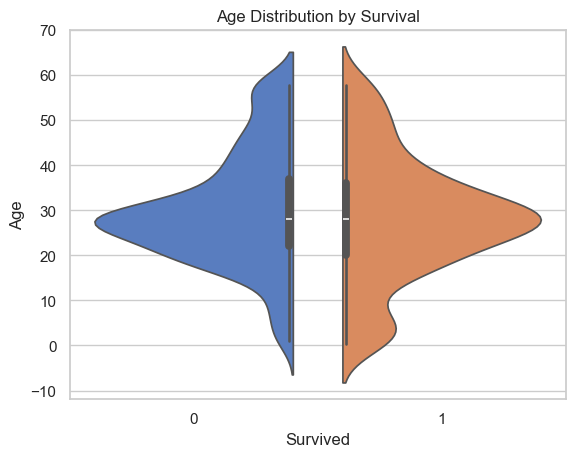

In [386]:
# Violin plot for Age distribution by Survival.
sns.violinplot(
    x="Survived", 
    y="Age", 
    data=one_hot_encoded_data, 
    palette="muted", split=True
)
plt.title('Age Distribution by Survival')

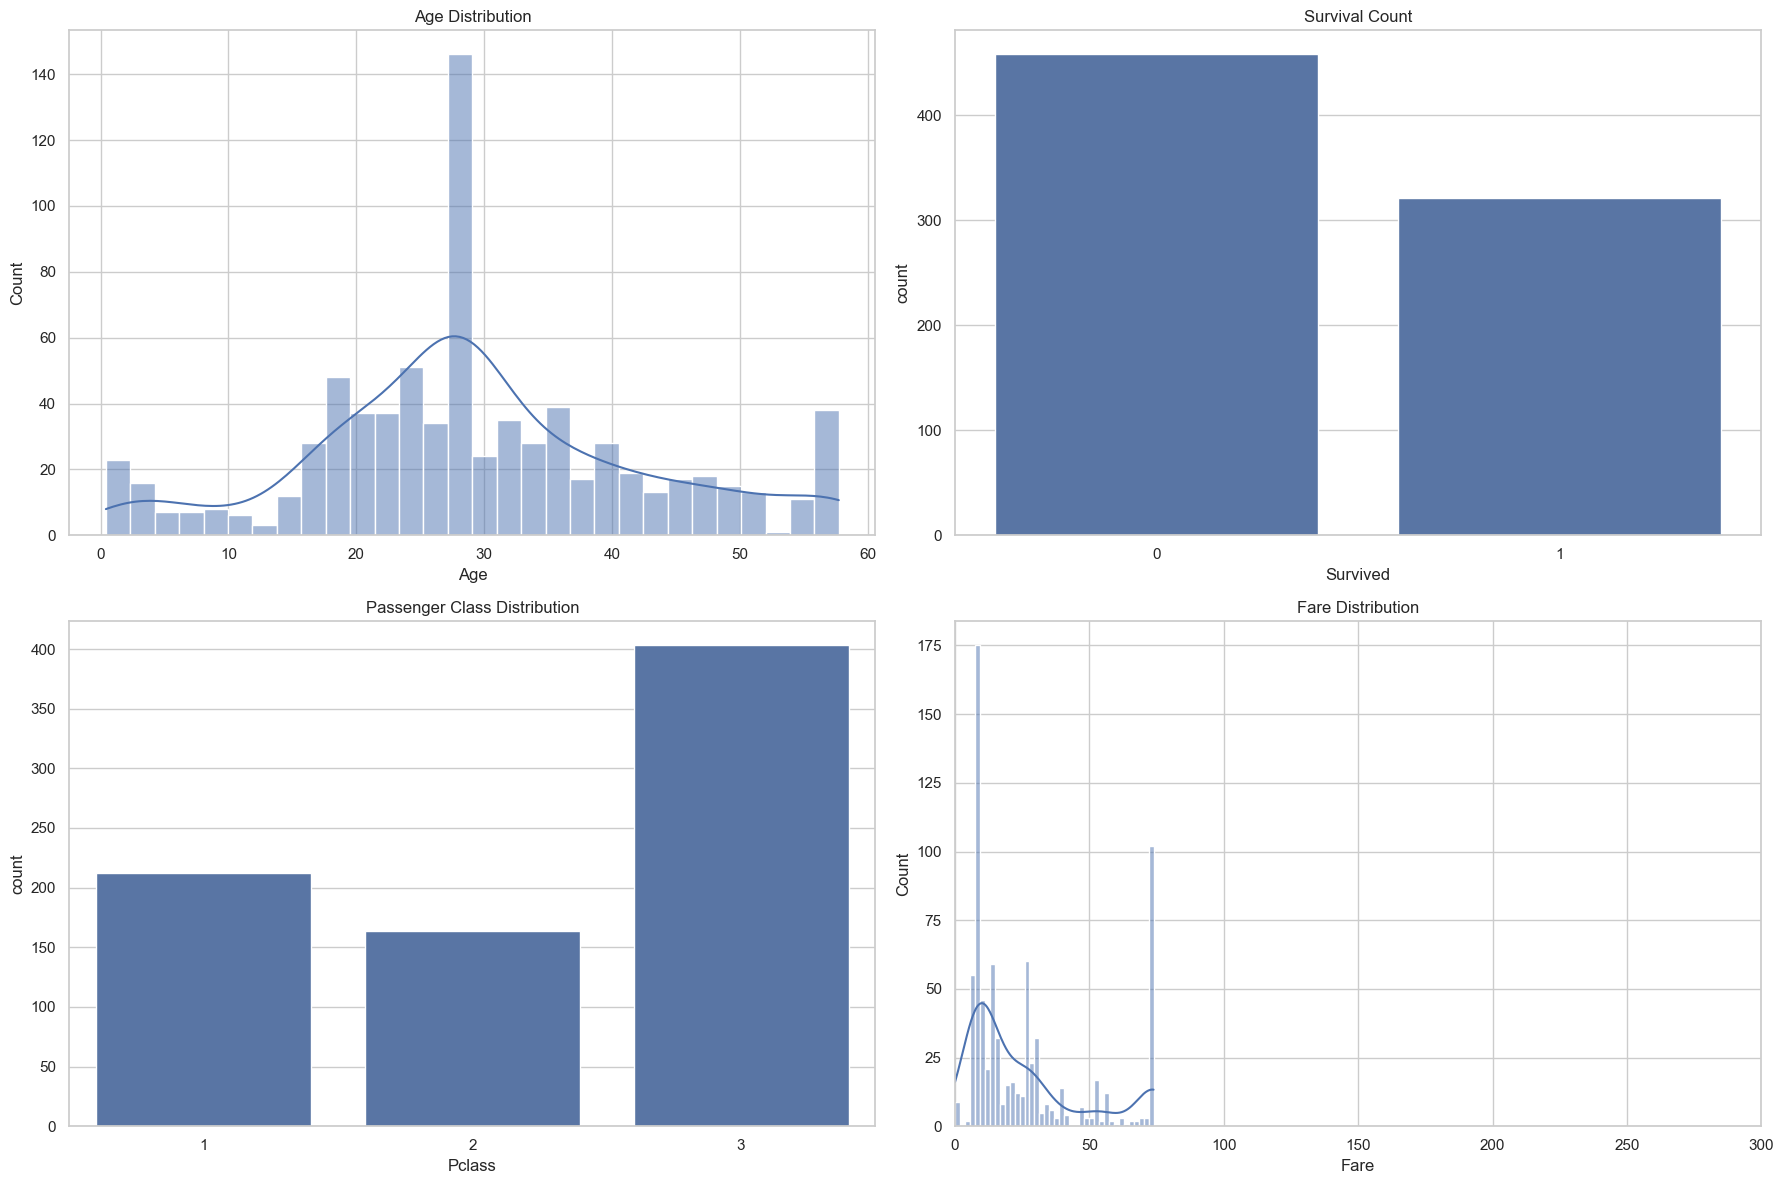

In [387]:
# Setting the aesthetics for seaborn plots.
sns.set(style="whitegrid")

# Visualising the distribution of key variables.
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Histogram of Age.
sns.histplot(one_hot_encoded_data['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Bar plot of Survival Count.
sns.countplot(x='Survived', data=one_hot_encoded_data, ax=axes[0, 1])
axes[0, 1].set_title('Survival Count')

# Bar plot of Passenger Class.
sns.countplot(x='Pclass', data=one_hot_encoded_data, ax=axes[1, 0])
axes[1, 0].set_title('Passenger Class Distribution')

# Histogram of Fare.
sns.histplot(one_hot_encoded_data['Fare'], bins=40, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlim(0, 300)

plt.tight_layout()
plt.show()

In [388]:
# Correlation Analysis.
# Calculating the correlation matrix for numerical variables.
corr_matrix = one_hot_encoded_data.corr()
print(corr_matrix)

            Survived    Pclass       Age      Fare    Family  Sex_female  \
Survived    1.000000 -0.338073 -0.075011  0.306660  0.120046    0.512654   
Pclass     -0.338073  1.000000 -0.343843 -0.737663 -0.014076   -0.119160   
Age        -0.075011 -0.343843  1.000000  0.146921 -0.274393   -0.086255   
Fare        0.306660 -0.737663  0.146921  1.000000  0.352142    0.219708   
Family      0.120046 -0.014076 -0.274393  0.352142  1.000000    0.248587   
Sex_female  0.512654 -0.119160 -0.086255  0.219708  0.248587    1.000000   
Sex_male   -0.512654  0.119160  0.086255 -0.219708 -0.248587   -1.000000   
Embarked_C  0.167264 -0.251963  0.037762  0.282430  0.006953    0.083106   
Embarked_Q -0.038745  0.210596 -0.035272 -0.154836 -0.059704    0.043809   
Embarked_S -0.126820  0.101250 -0.012986 -0.161401  0.028994   -0.100205   
Cluster          NaN       NaN       NaN       NaN       NaN         NaN   

            Sex_male  Embarked_C  Embarked_Q  Embarked_S  Cluster  
Survived   -0.51265

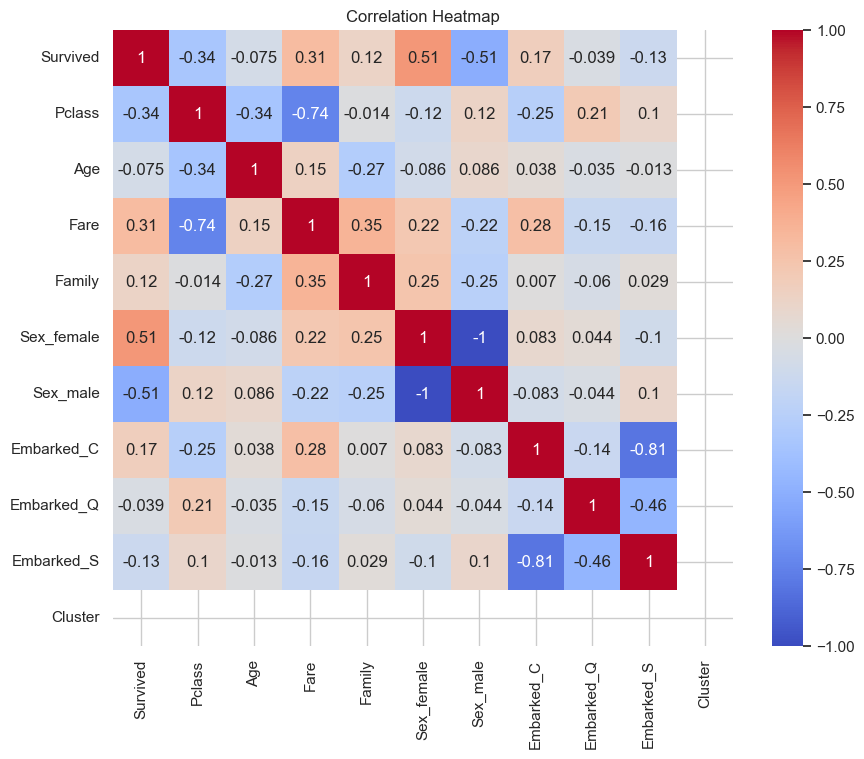

In [389]:
# Visualising the correlation matrix using a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [391]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [392]:
# Principal Component Analysis (PCA)
# Standardizing the numerical features.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(one_hot_encoded_data.drop('Survived', axis=1))

In [393]:
# Perform PCA.
pca = PCA()
pca.fit(scaled_data)

PCA()

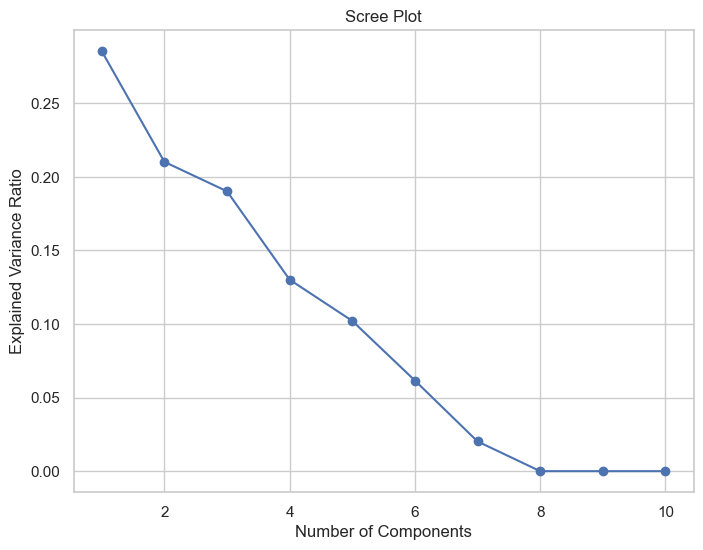

In [394]:
# Visualising the explained variance ratio using a scree plot.
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

In [395]:
# K-means Clustering.
# Apply k-means clustering to identify natural groupings in the data.
kmeans = KMeans(n_clusters=1, random_state=42)
kmeans.fit(scaled_data)
one_hot_encoded_data['Cluster'] = kmeans.labels_

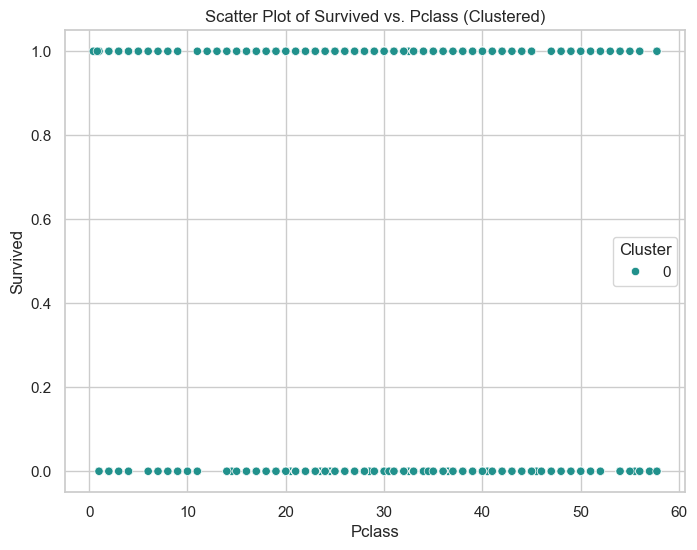

In [396]:
# Visualising the clusters using scatter plots.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Survived', hue='Cluster', data=one_hot_encoded_data, palette='viridis')
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.title("Scatter Plot of Survived vs. Pclass (Clustered)")
plt.show()

In [397]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [398]:
# Correlation with Target Variable.
# Calculating the correlation between each feature and the target 
# variable.
corr_with_target = one_hot_encoded_data.corr()['Survived'].sort_values(
    ascending=False
)
print("Correlation with Target Variable:")
print(corr_with_target)

Correlation with Target Variable:
Survived      1.000000
Sex_female    0.512654
Fare          0.306660
Embarked_C    0.167264
Family        0.120046
Embarked_Q   -0.038745
Age          -0.075011
Embarked_S   -0.126820
Pclass       -0.338073
Sex_male     -0.512654
Cluster            NaN
Name: Survived, dtype: float64


In [399]:
# Permutation Importance.
# Using Random Forest to calculate permutation importance.
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(
    one_hot_encoded_data.drop('Survived', axis=1), 
    one_hot_encoded_data['Survived']
)
perm_importance = permutation_importance(
    rf, 
    one_hot_encoded_data.drop('Survived', axis=1), 
    one_hot_encoded_data['Survived'], n_repeats=10, random_state=42
)

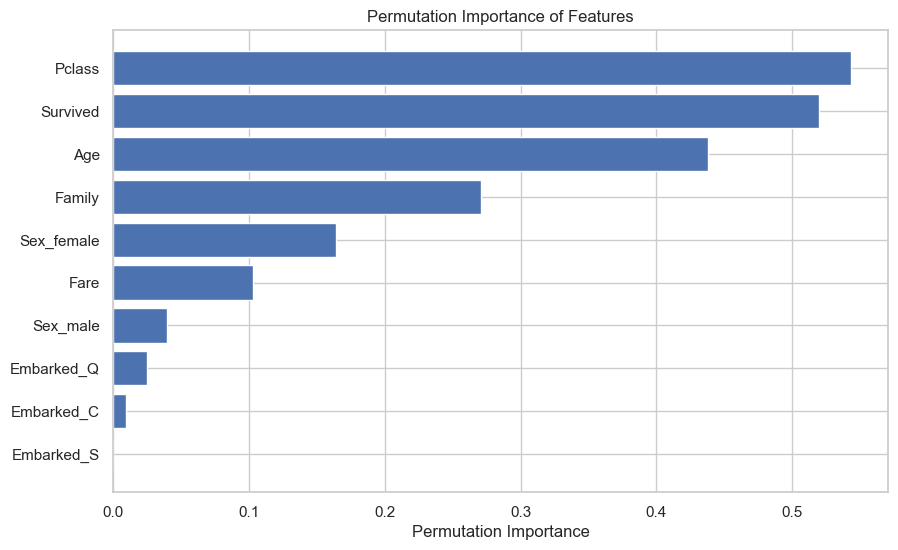

In [400]:
# Visualising the permutation importance.
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(
    one_hot_encoded_data.columns[sorted_idx], 
    perm_importance.importances_mean[sorted_idx]
)
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features")
plt.show()

In order to Permutation importance, Pclass is the most important factor in determining survival of the titanic incident.

The passengers in the 1 st class were given preference on lifeboats rather than other classes. It clearly shows on violin plot class distribution by survival.

Women and children were more likely to survive compared to adult males, reflecting the "women and children first" protocol followed.

Passengers with smaller family sizes, typically family of 2 and 3 members, had a higher chance of survival compared to those with larger families.